# Dataset 1 


# USA Covid 19 Dataset.

In [ ]:
A new coronavirus designated 2019-nCoV was first identified in Wuhan, the capital of China's Hubei province.People developed pneumonia without a clear cause and for which existing vaccines or treatments were not effective.The virus has shown evidence of human-to-human transmission
Transmission rate (rate of infection) appeared to escalate in mid-January 2020
As of 30 January 2020, approximately 8,243 cases have been confirmed.

The first American case was reported on January 20, and President Donald Trump declared the U.S. outbreak a public health emergency on January 31. Restrictions were placed on flights arriving from China. 
The first known American deaths occurred in February. On March 6, 2020, Trump allocated $8.3 billion to fight the outbreak and declared a national emergency on March 13.
COVID-19 vaccines became available in December 2020, under emergency use, beginning the national vaccination program, with the first vaccine officially approved by the Food and Drug Administration (FDA) on August 23, 2021. 

The data we analysied below is a record showing the mumber of confirmed cases and deaths in states of the US. This was recoded over a period of time. This Analysis is done to show the impact of the virus across the different states and counties and across different times.

insights uncovered are stated as the Analysis program.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

Data_5 = pd.read_csv('/Users/hannwenyein/Downloads/archive/usa_county_wise.csv')
Data_5.head()

As seen this is a table that shows the variables we have in our dataframe. We have columns that contain date, number of confirmed cases, number of deaths etc. the full column names are seen with the function below.

In [2]:
list(Data_5.columns)

['UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key',
 'Date',
 'Confirmed',
 'Deaths']

Having seen the colum names, The next step we undertook is to check the type of data we are dealing with. we also checked for the null values. null value shows the the number of values that are missing. This value can have effects on our analysis depending on what we are doing.

In [3]:
Data_5.info()
Data_5.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


UID                  0
iso2                 0
iso3                 0
code3                0
FIPS              1880
Admin2            1128
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Combined_Key         0
Date                 0
Confirmed            0
Deaths               0
dtype: int64

# Date, Month and Year Extraction.

The next step taken here is to extract the dates and add colums that carry the month and year seprately. This is needed for the analysis we are to carry out.

In [4]:
Data_5['Date'].dtype

dtype('O')

In [5]:
def month_from_number(x):
    month_names = ['Jan', 'Feb', 'Mar',
                   'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep',
                   'Oct', 'Nov', 'Dec']
    return month_names[int(x) - 1]

In [6]:
Data_5['Date_month'] = Data_5['Date'].apply(lambda x: x.split('/')[0])
Data_5['Date_yesr'] = Data_5['Date'].apply(lambda x: x.split('/')[2])
Data_5['Date_month_name'] = Data_5['Date_month'].apply(month_from_number)
Data_5.head()

UID iso2 iso3  code3     FIPS    Admin2            Province_State  \
0        16   AS  ASM     16     60.0       NaN            American Samoa   
1       316   GU  GUM    316     66.0       NaN                      Guam   
2       580   MP  MNP    580     69.0       NaN  Northern Mariana Islands   
3  63072001   PR  PRI    630  72001.0  Adjuntas               Puerto Rico   
4  63072003   PR  PRI    630  72003.0    Aguada               Puerto Rico   

  Country_Region        Lat       Long_                  Combined_Key  \
0             US -14.271000 -170.132000            American Samoa, US   
1             US  13.444300  144.793700                      Guam, US   
2             US  15.097900  145.673900  Northern Mariana Islands, US   
3             US  18.180117  -66.754367     Adjuntas, Puerto Rico, US   
4             US  18.360255  -67.175131       Aguada, Puerto Rico, US   

      Date  Confirmed  Deaths Date_month Date_yesr Date_month_name  
0  1/22/20          0       0          1        20             Jan  
1  1/22/20          0       0          1        20             Jan  
2  1/22/20          0       0          1        20             Jan  
3  1/22/20          0       0          1        20             Jan  
4  1/22/20          0       0          1        20             Jan

# Descriptive Analysis.

Descriptive analysis is a statistical technique that involves summarizing and providing a comprehensive description of a dataset.  This technique encompasses identifying key features of the data such as central tendency (mean media and mode), dispersion (range variance and standard deviation and distribution of data. Additionally, it involves utilizing visual aids such as scatter plot, box plot and histogram to illustrate the data set and its characteristics. 
The primary objective of descriptive analysis is to present a clear and concise summary of the data by identifying essential patterns and trends. It aids in comprehending the nature of the data and detecting any unusual observations or outliers. It is also useful in identifying any inconsistencies in the data set. Descriptive analysis is the first step to take in data analysis as it aids the understanding of the data set and recognizing the patterns and relations embedded in the data.  These patterns are very vital to further statistical analysis or modeling.  This step is also part of the exploratory data analysis which is an approach to analyzing data set to get their main characteristics using statistical and visual techniques


# Statistical Techniques.

In [7]:
print(Data_5.describe())

                UID          code3           FIPS            Lat  \
count  6.279200e+05  627920.000000  626040.000000  627920.000000   
mean   8.342958e+07     834.491617   33061.684685      36.707212   
std    4.314702e+06      36.492620   18636.156825       9.061572   
min    1.600000e+01      16.000000      60.000000     -14.271000   
25%    8.401811e+07     840.000000   19079.000000      33.895587   
50%    8.402921e+07     840.000000   31014.000000      38.002344   
75%    8.404612e+07     840.000000   47131.000000      41.573069   
max    8.410000e+07     850.000000   99999.000000      69.314792   

               Long_      Confirmed         Deaths  
count  627920.000000  627920.000000  627920.000000  
mean      -88.601474     357.284285      17.536328  
std        21.715747    3487.282694     300.991466  
min      -174.159600       0.000000       0.000000  
25%       -97.790204       0.000000       0.000000  
50%       -89.486710       4.000000       0.000000  
75%       -82.31

Dataset Overview:

The dataset consists of 627,920 records or observations and each record contains the following attributes:

UID: Unique identifier for each location.
code3: Three-digit country code.
FIPS: Federal Information Processing Standards code.
Lat: Latitude coordinate of the location.
Long_: Longitude coordinate of the location.
Confirmed: Number of confirmed COVID-19 cases.
Deaths: Number of deaths due to COVID-19.
Descriptive Statistics:

UID: The unique identifier ranges from 16 to 84,100,000, with an average of 83,429,580 and a standard deviation of 4,314,702.
code3: The three-digit country code ranges from 16 to 850, with an average of 834.49 and a standard deviation of 36.49.
FIPS: The Federal Information Processing Standards code ranges from 60 to 99,999, with an average of 33,061.68 and a standard deviation of 18,636.16.
Lat: The latitude coordinates range from -14.271 to 69.314792, with an average of 36.71 and a standard deviation of 9.06.
Long_: The longitude coordinates range from -174.1596 to 145.6739, with an average of -88.60 and a standard deviation of 21.72.
Confirmed: The number of confirmed COVID-19 cases ranges from 0 to 224,051, with an average of 357.28 and a standard deviation of 3,487.28.
Deaths: The number of deaths due to COVID-19 ranges from 0 to 23,500, with an average of 17.54 and a standard deviation of 300.99.
Observations:

The dataset contains a wide range of locations based on the UID, which serves as a unique identifier.
The code3 attribute represents the three-digit country code, indicating that the dataset may include data from multiple countries.
The FIPS attribute likely represents the Federal Information Processing Standards code, which could be used for regional or administrative divisions within a country.
The latitude and longitude coordinates provide geographical information about each location.
The Confirmed attribute indicates the number of confirmed COVID-19 cases, with a wide variation observed across the dataset.
The Deaths attribute represents the number of deaths due to COVID-19, displaying a similar wide range of values. This means that not all the states have similar figures. further analysis may provides insights as to why some state experienced the figures recoded for them.


# Visializations

# Distributions Accross States

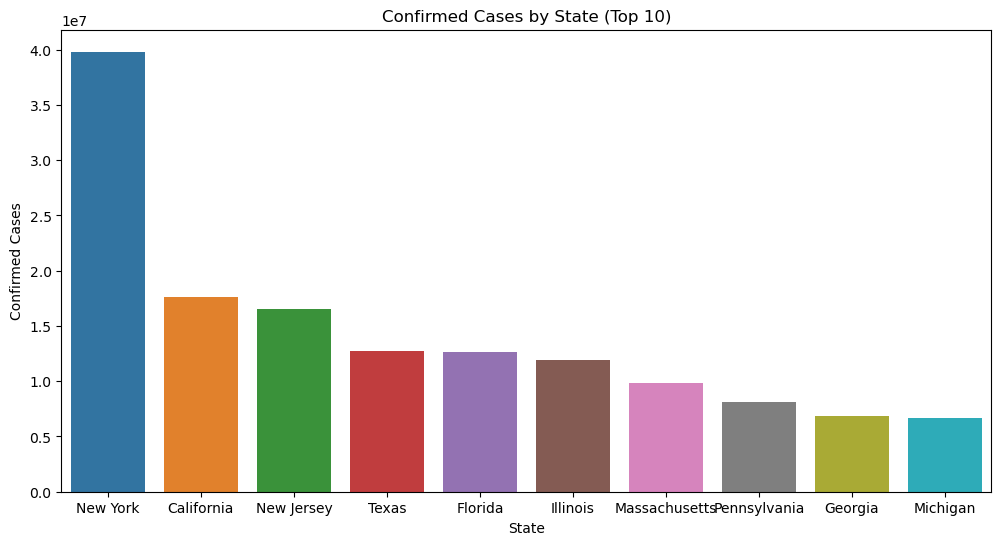

In [8]:
# Top 10 confirmed cases by state.

cases_by_country = Data_5.groupby('Province_State')['Confirmed'].sum().reset_index()
cases_by_country = cases_by_country.sort_values('Confirmed', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Province_State', y='Confirmed', data=cases_by_country.head(10))
plt.title('Confirmed Cases by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Confirmed Cases')
plt.show()


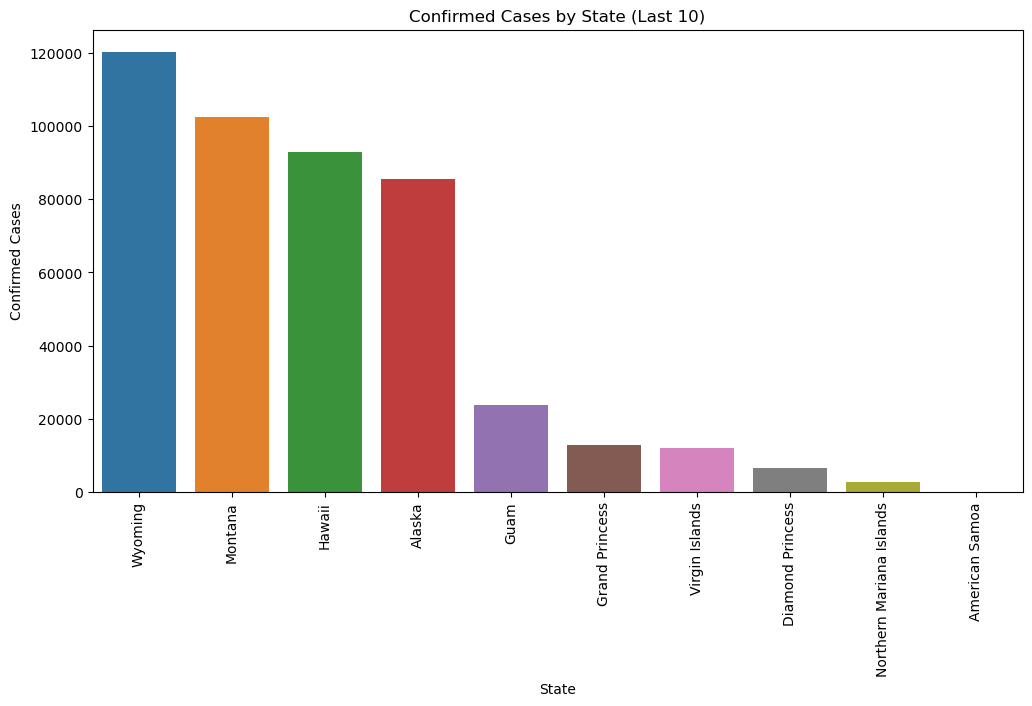

In [9]:
# Last 10 confirmed cases by states

cases_by_country = Data_5.groupby('Province_State')['Confirmed'].sum().reset_index()
cases_by_country = cases_by_country.sort_values('Confirmed', ascending=False).tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Province_State', y='Confirmed', data=cases_by_country)
plt.title('Confirmed Cases by State (Last 10)')
plt.xlabel('State')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.show()


The 2 plots above shows the first 10 and the last 10 states in terms of confiremd cases. 

New York. Califonia and New Jersy lead the pack in terms of the states with the jighest number of confirmed cases.American samoa, Northen Mariana islands and Diamond princess had the least confimed cases. 
further analysis can be dne to discover reasons behind these figure but they are beyond the scope of this analysis as we are restricted by the information we have.



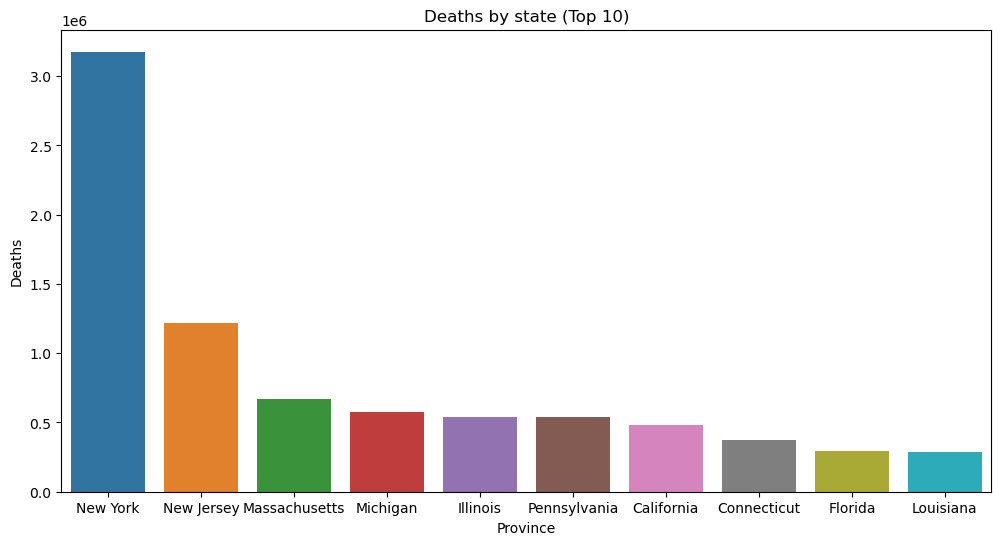

In [10]:
# Top 10 Deaths by state.

deaths_by_country = Data_5.groupby('Province_State')['Deaths'].sum().reset_index()
deaths_by_country = deaths_by_country.sort_values('Deaths', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Province_State', y='Deaths', data=deaths_by_country.head(10))
plt.title('Deaths by state (Top 10)')
plt.xlabel('Province')
plt.ylabel('Deaths')
plt.show()


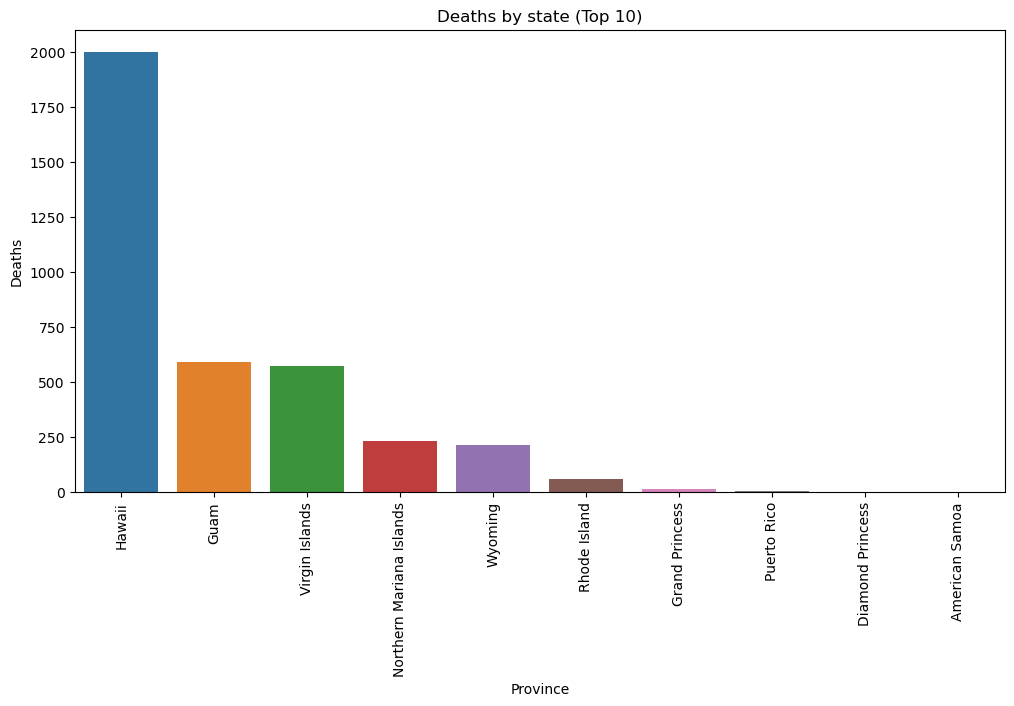

In [11]:
# least 10 Deaths by state.

deaths_by_country = Data_5.groupby('Province_State')['Deaths'].sum().reset_index()
deaths_by_country = deaths_by_country.sort_values('Deaths', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Province_State', y='Deaths', data=deaths_by_country.tail(10))
plt.title('Deaths by state (Top 10)')
plt.xlabel('Province')
plt.ylabel('Deaths')
plt.xticks(rotation=90)
plt.show()

New York, New Jersy and Massachusets lead the state with highsest number of deaths.  the least list is lead by American samoa, diamond princess and Pueto Rico.

lets look at the whole spread.


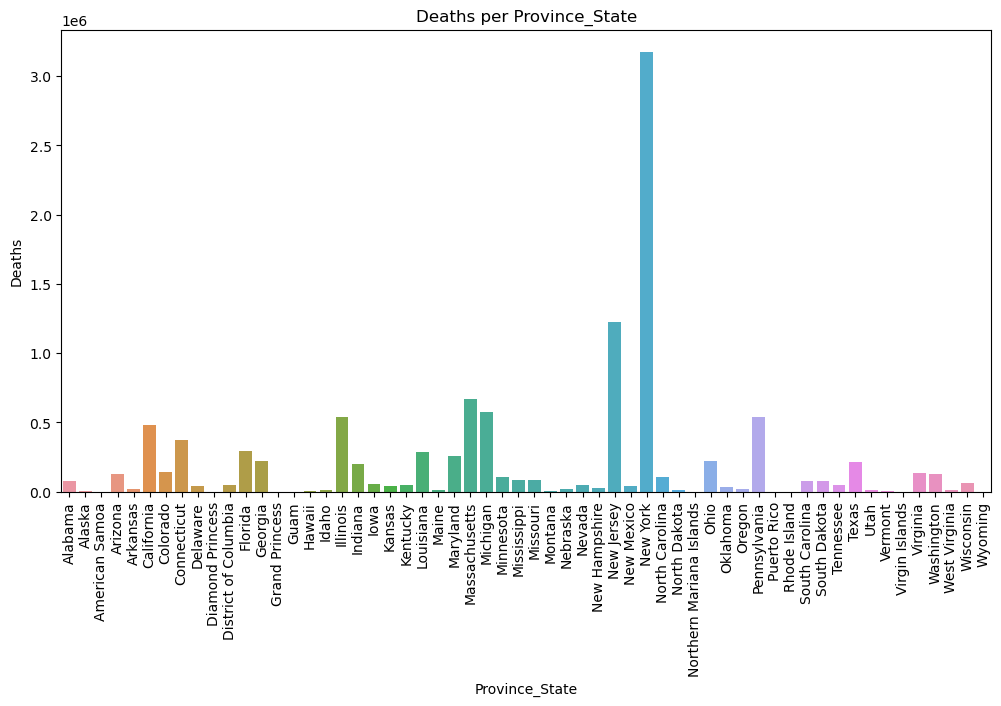

In [12]:


# Group data by Province_State and sum up the deaths

deaths_by_state = Data_5.groupby(['Province_State'])['Deaths'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Province_State', y='Deaths', data=deaths_by_state)
plt.title('Deaths per Province_State')
plt.xlabel('Province_State')
plt.ylabel('Deaths')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


In [13]:


# Group data by Province_State and sum up the deaths

deaths_by_state = Data_5.groupby(['Province_State'])['Confirmed'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Province_State', y='Confirmed', data=deaths_by_state)
plt.title('Confirmed Cases per Province_State')
plt.xlabel('Province_State')
plt.ylabel('Confirmed')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()

# Confirmed Cased and Deaths Across Months.

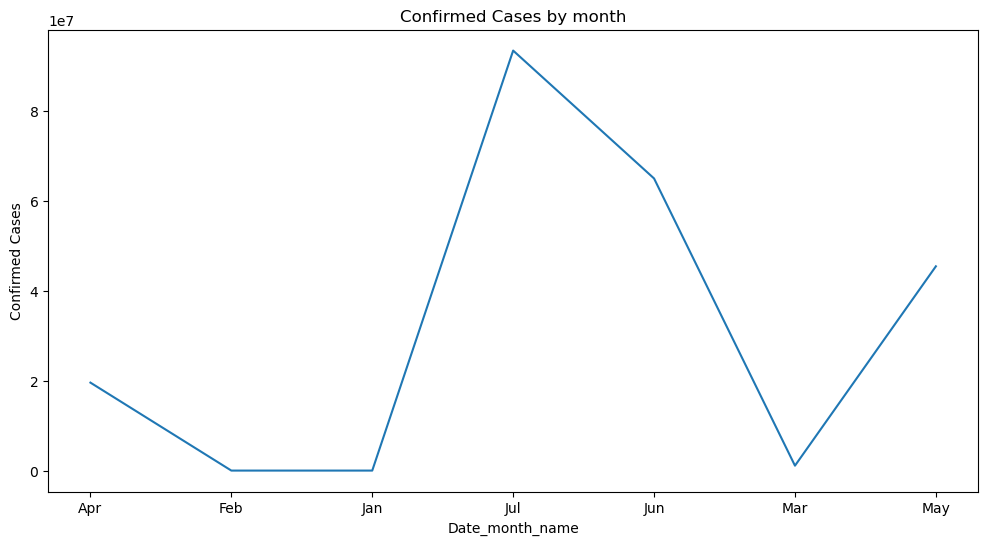

In [14]:
# Confirmed cases over months

cases_over_time = Data_5.groupby('Date_month_name')['Confirmed'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_month_name', y='Confirmed', data=cases_over_time)
plt.title('Confirmed Cases by month')
plt.xlabel('Date_month_name')
plt.ylabel('Confirmed Cases')
plt.show()


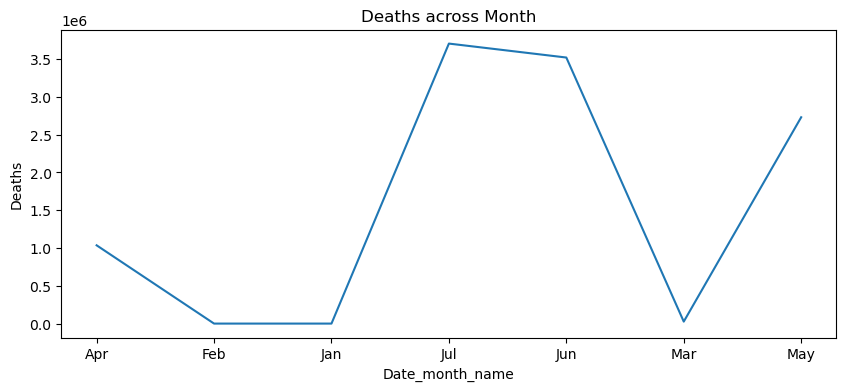

In [15]:
# Deaths over time

deaths_over_time = Data_5.groupby('Date_month_name')['Deaths'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.lineplot(x='Date_month_name', y='Deaths', data=deaths_over_time)
plt.title('Deaths across Month')
plt.xlabel('Date_month_name')
plt.ylabel('Deaths')
plt.show()

The 2 line graph above shows the number of confirmed cases and deaths across the months we have in out dataset.
for confirmed cases, July, June and May has the highest number og confirmed covid cases.

These 3 months again lead the pack when it comes to number of deaths recoded accross the months. 


# Confirmed Cases and Death Across Longitude and Latitude

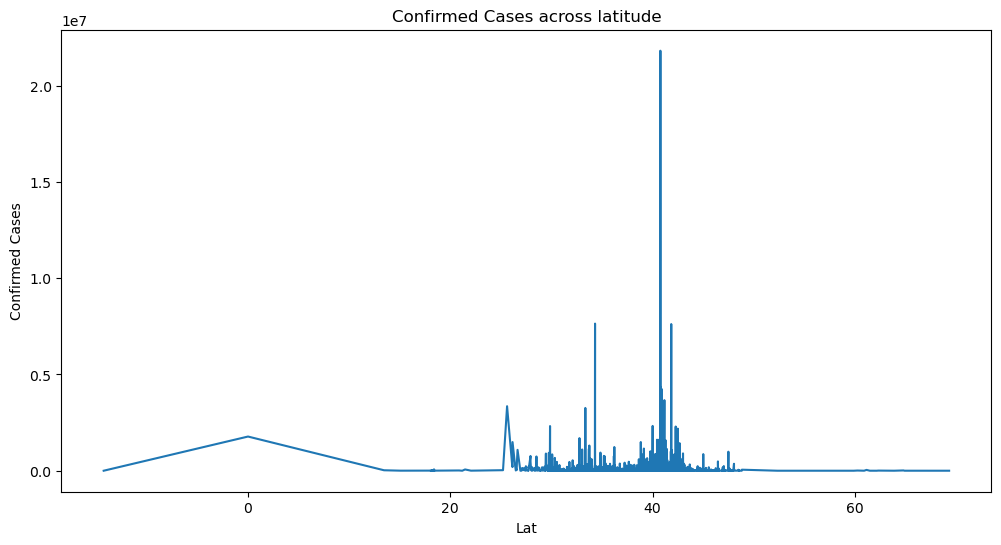

In [16]:
# Confirmed cases over LAT
cases_over_time = Data_5.groupby('Lat')['Confirmed'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Lat', y='Confirmed', data=cases_over_time)
plt.title('Confirmed Cases across latitude')
plt.xlabel('Lat')
plt.ylabel('Confirmed Cases')
plt.show()

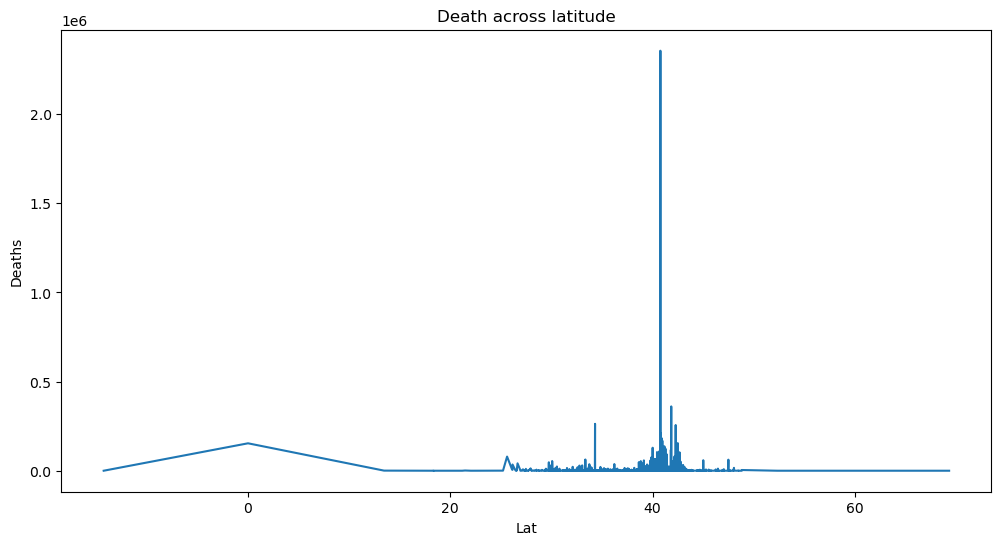

In [17]:
# Confirmed cases over LAT
cases_over_time = Data_5.groupby('Lat')['Deaths'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Lat', y='Deaths', data=cases_over_time)
plt.title('Death across latitude')
plt.xlabel('Lat')
plt.ylabel('Deaths')
plt.show()

The 2 plots show us a consestency in partterns for confirmed cases and deaths across the lattitudes. the lattitudes represent places on the map. we observe that certain places have high rates of the 2 variables while some recoded low cases. 

Lets equally look at the effects across latitiudes

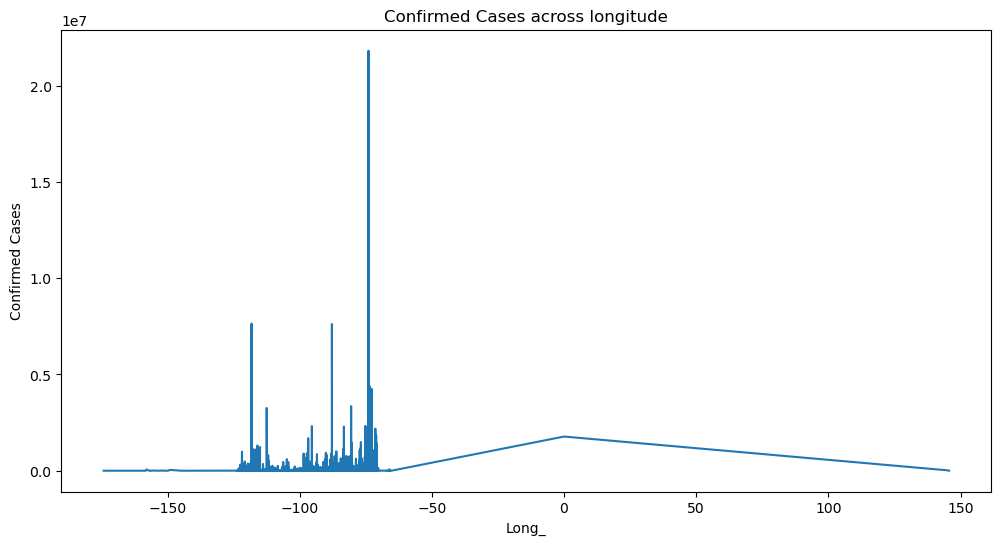

In [18]:
# Confirmed cases over LAT
cases_over_time = Data_5.groupby('Long_')['Confirmed'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Long_', y='Confirmed', data=cases_over_time)
plt.title('Confirmed Cases across longitude')
plt.xlabel('Long_')
plt.ylabel('Confirmed Cases')
plt.show()

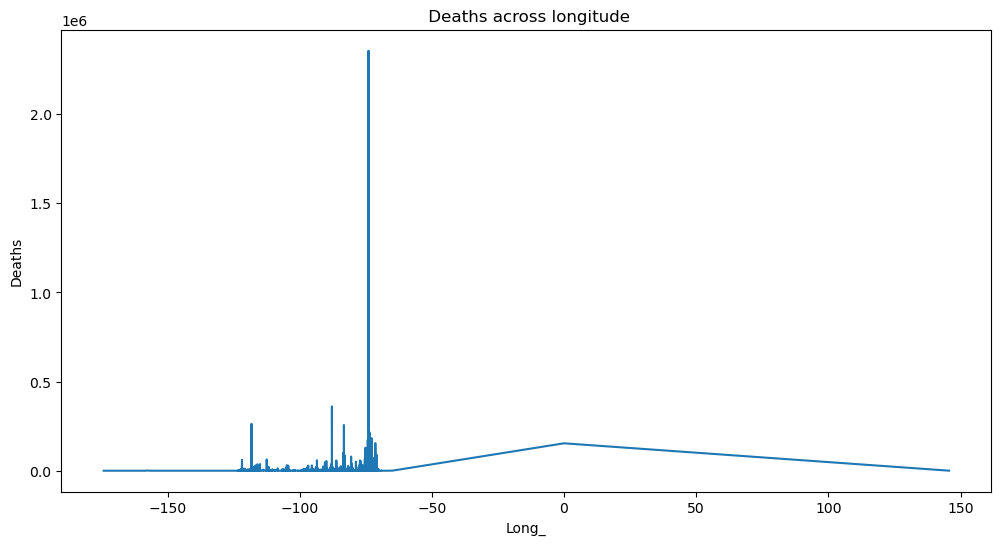

In [19]:
# Confirmed cases over LAT
cases_over_time = Data_5.groupby('Long_')['Deaths'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Long_', y='Deaths', data=cases_over_time)
plt.title(' Deaths across longitude')
plt.xlabel('Long_')
plt.ylabel('Deaths')
plt.show()

The same parten is seen for the longitude as well.

As i have mention earlier further analysis may uncover why these distributions are so. Especially when you put population density or land mass into contest. However they are beyond the scope of this analysis as we do not have the required information.

# Scatter Plots

# Confirmed Cases, Deaths, Lattitude and Longitude

Here we create some visuals with a scatter plot.

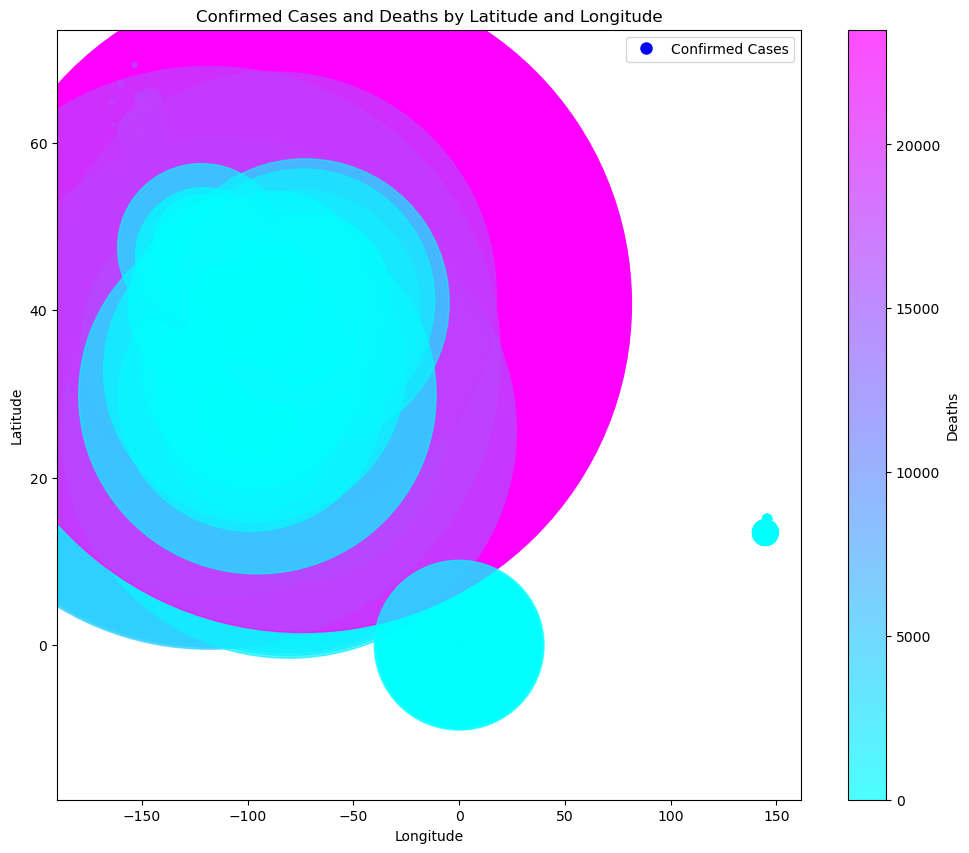

In [20]:
# Create a scatter plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(Data_5['Long_'], Data_5['Lat'], s=Data_5['Confirmed'], c=Data_5['Deaths'], cmap='cool', alpha=0.7)

plt.title('Confirmed Cases and Deaths by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add color bar legend
cbar = plt.colorbar(scatter, label='Deaths')

# Create a custom legend for Confirmed Cases
legend_confirmed = plt.Line2D([], [], marker='o', color='white', markerfacecolor='blue', markersize=10, label='Confirmed Cases')

# Add the legend
plt.legend(handles=[legend_confirmed], loc='upper right')

plt.show()


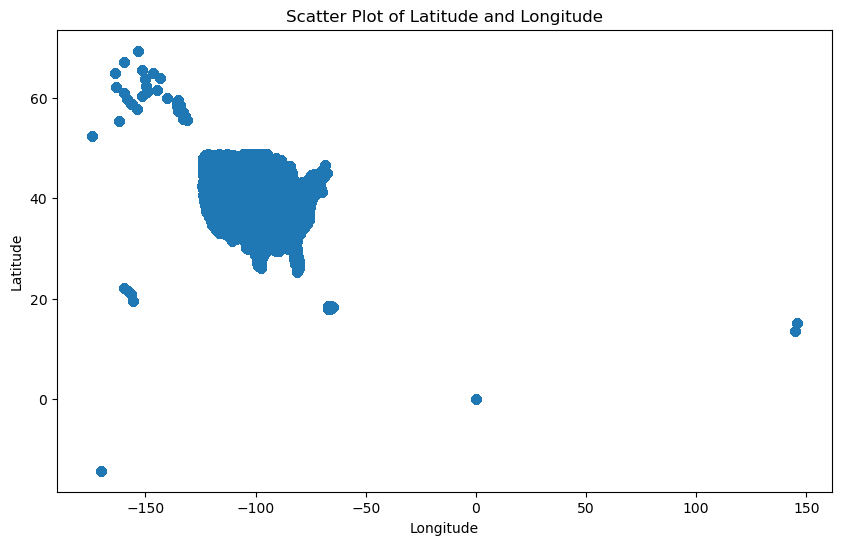

In [21]:
# Scatter plot of latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(Data_5['Long_'], Data_5['Lat'], alpha=0.5)
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Distribution of Longitude and Lattitude.

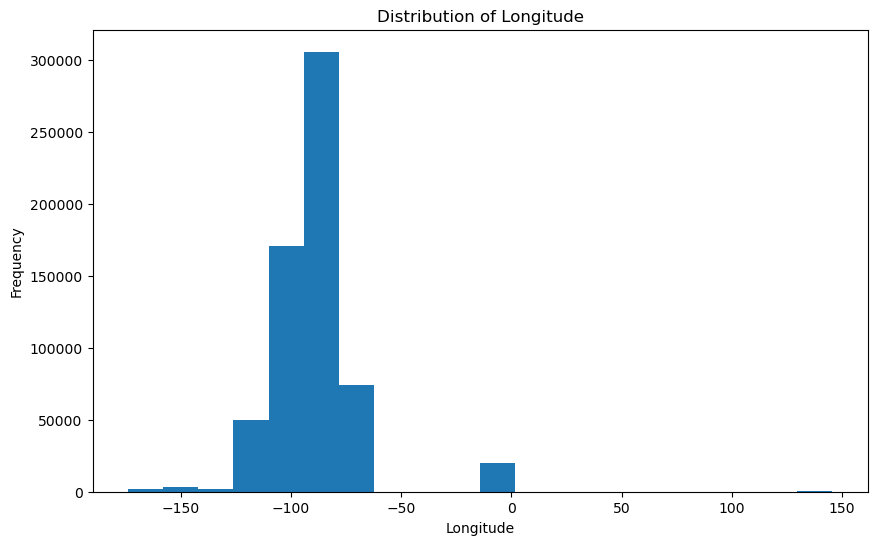

In [22]:

# Summary statistics
latitude_stats = Data_5['Lat'].describe()
longitude_stats = Data_5['Long_'].describe()

# Histogram of latitude values
plt.figure(figsize=(10, 6))
plt.hist(Data_5['Lat'], bins=20)
plt.title('Distribution of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

# Histogram of longitude values
plt.figure(figsize=(10, 6))
plt.hist(Data_5['Long_'], bins=20)
plt.title('Distribution of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()


# Cofirmed Cases and Death Across different States over time.

In [283]:
# Group data by Province_State and Date and sum up the confirmed and deaths
cases_by_state_date = Data_5.groupby(['Province_State', 'Date_month_name'])[['Confirmed',"Deaths"]].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_month_name', y='Confirmed', hue='Province_State', data=cases_by_state_date)
sns.lineplot(x='Date_month_name', y='Deaths', hue='Province_State', data=cases_by_state_date)
plt.title('Confirmed and Deaths per Province_State')
plt.xlabel('Date_month_name')
plt.ylabel('Cases')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()


# Correlation

Correlation is a statistical measure that quantifies the relationship between two variables. It indicates how changes in one variable are associated with changes in another variable. Correlation values range from -1 to 1, where:

A correlation coefficient of 1 indicates a perfect positive correlation. This means that as one variable increases, the other variable also increases in a linear manner.
A correlation coefficient of -1 indicates a perfect negative correlation. This means that as one variable increases, the other variable decreases in a linear manner.
A correlation coefficient of 0 indicates no linear correlation between the variables. There is no relationship between the variables.
Correlation is often represented using a correlation coefficient, such as the Pearson correlation coefficient. The Pearson correlation coefficient measures the linear relationship between two variables. It is calculated by dividing the covariance of the variables by the product of their standard deviations. The resulting coefficient ranges from -1 to 1, with 0 indicating no linear correlation.

In [284]:

# Calculate the correlation between confirmed cases and deaths
correlation = Data_5['Confirmed'].corr(Data_5['Deaths'])

print("Correlation between Confirmed Cases and Deaths:", correlation)


Correlation between Confirmed Cases and Deaths: 0.8986287883215353


A correlation coefficient of 0.8986 indicates a strong positive correlation between confirmed cases and deaths. This means that there is a significant relationship between the number of confirmed cases and the number of deaths.

The value of 0.8986 suggests that as the number of confirmed cases increases, there is a strong tendency for the number of deaths to also increase. The correlation coefficient of 0.8986 indicates that the relationship between these variables is relatively close to a perfect positive correlation.

In [285]:

# Create a scatter plot with a trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='Confirmed', y='Deaths', data=Data_5)
plt.title('Correlation between Confirmed Cases and Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()


# Dataset 2


# World Meter Covid 19 Dataset.

1: Load the COVID-19 dataset

2: Data Exploring: checking rows, columns in the dataset, All columns datatypes, names and value count,Checking for status and total number of Country and WHO Region

3: Data Cleaning and Preprocessing: Checking null values, outlier and do some combining work on missing values columns and removing out liner.

4: Data Modeling: In this secition, Liner Regression, Descriptive Statistics and Comparative Analysis,one-way ANOVA test are applied to get insight data from the dataset.

5: Visialization

In [23]:
#loading data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for removing outliers
from scipy import stats

#regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#ANOVA  test
from scipy.stats import f_oneway

# 1. Data Loading

In [24]:
# Load the COVID-19 dataset

world_meter = pd.read_csv('/Users/hannwenyein/Downloads/archive/worldometer_data.csv')
world_meter.head(10)

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   
5         Mexico  North America  1.290662e+08      462690    6590.0   
6           Peru  South America  3.301632e+07      455409       NaN   
7          Chile  South America  1.913251e+07      366671       NaN   
8       Colombia  South America  5.093626e+07      357710       NaN   
9          Spain         Europe  4.675665e+07      354530       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   
5      50517.0      819.0        308848.0        4140.0     103325.0   
6      20424.0        NaN        310337.0           NaN     124648.0   
7       9889.0        NaN        340168.0           NaN      16614.0   
8      11939.0        NaN        192355.0           NaN     153416.0   
9      28500.0        NaN             NaN           NaN          NaN   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   
5            3987.0            3585.0          391.0   1056915.0   
6            1426.0           13793.0          619.0   2493429.0   
7            1358.0           19165.0          517.0   1760615.0   
8            1493.0            7023.0          234.0   1801835.0   
9             617.0            7582.0          610.0   7064329.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa  
5        8189.0        Americas  
6       75521.0        Americas  
7       92022.0        Americas  
8       35374.0        Americas  
9      151087.0          Europe

# 2. Data Exploring 

In [25]:
# rows, columns in the dataset
world_meter.shape

(209, 16)

In [26]:
# All columns datatypes, names and value count
world_meter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [27]:
# Checking for status
world_meter.describe(include='all')

Country/Region Continent    Population    TotalCases     NewCases  \
count             209       208  2.080000e+02  2.090000e+02     4.000000   
unique            209         6           NaN           NaN          NaN   
top               USA    Africa           NaN           NaN          NaN   
freq                1        57           NaN           NaN          NaN   
mean              NaN       NaN  3.041549e+07  9.171850e+04  1980.500000   
std               NaN       NaN  1.047661e+08  4.325867e+05  3129.611424   
min               NaN       NaN  8.010000e+02  1.000000e+01    20.000000   
25%               NaN       NaN  9.663140e+05  7.120000e+02    27.500000   
50%               NaN       NaN  7.041972e+06  4.491000e+03   656.000000   
75%               NaN       NaN  2.575614e+07  3.689600e+04  2609.000000   
max               NaN       NaN  1.381345e+09  5.032179e+06  6590.000000   

          TotalDeaths   NewDeaths  TotalRecovered  NewRecovered   ActiveCases  \
count      188.000000    3.000000    2.050000e+02      3.000000  2.050000e+02   
unique            NaN         NaN             NaN           NaN           NaN   
top               NaN         NaN             NaN           NaN           NaN   
freq              NaN         NaN             NaN           NaN           NaN   
mean      3792.590426  300.000000    5.887898e+04   1706.000000  2.766433e+04   
std      15487.184877  451.199512    2.566984e+05   2154.779803  1.746327e+05   
min          1.000000    1.000000    7.000000e+00     42.000000  0.000000e+00   
25%         22.000000   40.500000    3.340000e+02    489.000000  8.600000e+01   
50%        113.000000   80.000000    2.178000e+03    936.000000  8.990000e+02   
75%        786.000000  449.500000    2.055300e+04   2538.000000  7.124000e+03   
max     162804.000000  819.000000    2.576668e+06   4140.000000  2.292707e+06   

        Serious,Critical  Tot Cases/1M pop  Deaths/1M pop    TotalTests  \
count         122.000000        208.000000     187.000000  1.910000e+02   
unique               NaN               NaN            NaN           NaN   
top                  NaN               NaN            NaN           NaN   
freq                 NaN               NaN            NaN           NaN   
mean          534.393443       3196.024038      98.681176  1.402405e+06   
std          2047.518613       5191.986457     174.956862  5.553367e+06   
min             1.000000          3.000000       0.080000  6.100000e+01   
25%             3.250000        282.000000       6.000000  2.575200e+04   
50%            27.500000       1015.000000      29.000000  1.357020e+05   
75%           160.250000       3841.750000      98.000000  7.576960e+05   
max         18296.000000      39922.000000    1238.000000  6.313960e+07   

         Tests/1M pop WHO Region  
count      191.000000        184  
unique            NaN          6  
top               NaN     Europe  
freq              NaN         55  
mean     83959.366492        NaN  
std     152730.591240        NaN  
min          4.000000        NaN  
25%       8956.500000        NaN  
50%      32585.000000        NaN  
75%      92154.500000        NaN  
max     995282.000000        NaN

In [28]:
world_meter["WHO Region"].value_counts()

Europe                  55
Africa                  47
Americas                35
EasternMediterranean    22
WesternPacific          15
South-EastAsia          10
Name: WHO Region, dtype: int64

In [29]:
world_meter.groupby('Country/Region').TotalCases.sum().head(10)

Country/Region
Afghanistan             36896
Albania                  6016
Algeria                 33626
Andorra                   944
Angola                   1483
Antigua and Barbuda        92
Argentina              228195
Armenia                 39819
Aruba                     263
Australia               19890
Name: TotalCases, dtype: int64

# 3. Data Cleaning and Preprocessing

In [30]:
#checking null values
world_meter.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [31]:
#checking null values uing heatmap
sns.heatmap(world_meter.isnull())

<AxesSubplot:>

In [32]:
#filling 0 to null value 
world_meter.fillna(0, inplace=True)
world_meter.head(10)

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       0.0   
1         Brazil  South America  2.127107e+08     2917562       0.0   
2          India           Asia  1.381345e+09     2025409       0.0   
3         Russia         Europe  1.459409e+08      871894       0.0   
4   South Africa         Africa  5.938157e+07      538184       0.0   
5         Mexico  North America  1.290662e+08      462690    6590.0   
6           Peru  South America  3.301632e+07      455409       0.0   
7          Chile  South America  1.913251e+07      366671       0.0   
8       Colombia  South America  5.093626e+07      357710       0.0   
9          Spain         Europe  4.675665e+07      354530       0.0   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        0.0       2576668.0           0.0    2292707.0   
1      98644.0        0.0       2047660.0           0.0     771258.0   
2      41638.0        0.0       1377384.0           0.0     606387.0   
3      14606.0        0.0        676357.0           0.0     180931.0   
4       9604.0        0.0        387316.0           0.0     141264.0   
5      50517.0      819.0        308848.0        4140.0     103325.0   
6      20424.0        0.0        310337.0           0.0     124648.0   
7       9889.0        0.0        340168.0           0.0      16614.0   
8      11939.0        0.0        192355.0           0.0     153416.0   
9      28500.0        0.0             0.0           0.0          0.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   
5            3987.0            3585.0          391.0   1056915.0   
6            1426.0           13793.0          619.0   2493429.0   
7            1358.0           19165.0          517.0   1760615.0   
8            1493.0            7023.0          234.0   1801835.0   
9             617.0            7582.0          610.0   7064329.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa  
5        8189.0        Americas  
6       75521.0        Americas  
7       92022.0        Americas  
8       35374.0        Americas  
9      151087.0          Europe

In [33]:
#combining new numbers to the same existing ones to make one common columns
world_meter['TotalCases'] = world_meter['TotalCases'] + world_meter['NewCases']
world_meter['TotalDeaths'] = world_meter['TotalDeaths'] + world_meter['NewDeaths']
world_meter['TotalRecovered'] = world_meter['TotalRecovered'] + world_meter['NewRecovered']

world_meter['ActiveCases'] = (world_meter['TotalCases']- world_meter['TotalDeaths']) - world_meter['TotalRecovered']

world_meter.head(10)

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08   5032179.0       0.0   
1         Brazil  South America  2.127107e+08   2917562.0       0.0   
2          India           Asia  1.381345e+09   2025409.0       0.0   
3         Russia         Europe  1.459409e+08    871894.0       0.0   
4   South Africa         Africa  5.938157e+07    538184.0       0.0   
5         Mexico  North America  1.290662e+08    469280.0    6590.0   
6           Peru  South America  3.301632e+07    455409.0       0.0   
7          Chile  South America  1.913251e+07    366671.0       0.0   
8       Colombia  South America  5.093626e+07    357710.0       0.0   
9          Spain         Europe  4.675665e+07    354530.0       0.0   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        0.0       2576668.0           0.0    2292707.0   
1      98644.0        0.0       2047660.0           0.0     771258.0   
2      41638.0        0.0       1377384.0           0.0     606387.0   
3      14606.0        0.0        676357.0           0.0     180931.0   
4       9604.0        0.0        387316.0           0.0     141264.0   
5      51336.0      819.0        312988.0        4140.0     104956.0   
6      20424.0        0.0        310337.0           0.0     124648.0   
7       9889.0        0.0        340168.0           0.0      16614.0   
8      11939.0        0.0        192355.0           0.0     153416.0   
9      28500.0        0.0             0.0           0.0     326030.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   
5            3987.0            3585.0          391.0   1056915.0   
6            1426.0           13793.0          619.0   2493429.0   
7            1358.0           19165.0          517.0   1760615.0   
8            1493.0            7023.0          234.0   1801835.0   
9             617.0            7582.0          610.0   7064329.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa  
5        8189.0        Americas  
6       75521.0        Americas  
7       92022.0        Americas  
8       35374.0        Americas  
9      151087.0          Europe

In [34]:
#checking missing values
world_meter.isnull().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

In [35]:
#Drop unnecessary columns
world_meter.drop(['NewCases', 'NewDeaths', 'NewRecovered','Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop'],inplace=True, axis=1)
world_meter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         209 non-null    object 
 2   Population        209 non-null    float64
 3   TotalCases        209 non-null    float64
 4   TotalDeaths       209 non-null    float64
 5   TotalRecovered    209 non-null    float64
 6   ActiveCases       209 non-null    float64
 7   Serious,Critical  209 non-null    float64
 8   TotalTests        209 non-null    float64
 9   WHO Region        209 non-null    object 
dtypes: float64(7), object(3)
memory usage: 16.5+ KB


# Removing Outliers

In [36]:
# Define a function to detect and remove outliers using Z-score
def remove_outliers(world_meter, columns):
    z_scores = stats.zscore(world_meter[columns])
    world_meter_no_outliers = world_meter[(z_scores < 0).all(axis=1)]
    return world_meter_no_outliers

# Remove outliers from TotalCases and TotalDeaths columns
world_meter_no_outliers = remove_outliers(world_meter, ['Population','TotalCases', 'TotalDeaths','TotalRecovered','ActiveCases','TotalTests'])

# 4. Data Modeling
# Linear Regression

Linear regression analysis can provide insights that aid in decision-making. By understanding the relationships between variables, identify strategies or interventions that may help control the spread of COVID-19 or mitigate its impact.

In [37]:
# Select the features and target variable
X = world_meter[['Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered']]
y = world_meter['ActiveCases']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.7599020956890944e-20


A Mean Squared Error (MSE) of 2.7599020956890944e-20 indicates a very low error or discrepancy between the predicted values and the actual values in regression model. The MSE measures the average squared difference between the predicted values and the true values.

An MSE of 2.7599020956890944e-20 indicates that the linear regression model is predicting the ActiveCases based on the provided independent variables remarkably effectively.

# Descriptive Statistics

To get a deeper knowledge of the data and extract useful insights, descriptive analysis is utilised for COVID-19 datasets, containing particular columns such as Country/Region, Continent, Population, TotalCases, TotalDeaths, TotalRecovered, ActiveCases, TotalTests, and WHO Region.

Summary Statistics, Grouped Statistics, Percentiles, Finding Mode and Central Tendency are used as a Descriptive Statistics.

# Summary Statics

In [38]:
# Calculate summary statistics for numeric variables
summary_stats = world_meter[['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',  'TotalTests','Serious,Critical']].describe()

print(summary_stats)

         TotalCases    TotalDeaths  TotalRecovered   ActiveCases  \
count  2.090000e+02     209.000000    2.090000e+02  2.090000e+02   
mean   9.175640e+04    3415.822967    5.777660e+04  3.056398e+04   
std    4.326140e+05   14741.691606    2.543660e+05  1.749520e+05   
min    1.000000e+01       0.000000    0.000000e+00  0.000000e+00   
25%    7.120000e+02      12.000000    3.080000e+02  8.800000e+01   
50%    4.491000e+03      70.000000    2.010000e+03  9.960000e+02   
75%    3.689600e+04     600.000000    1.959600e+04  8.642000e+03   
max    5.032179e+06  162804.000000    2.576668e+06  2.292707e+06   

         TotalTests  Serious,Critical  
count  2.090000e+02        209.000000  
mean   1.281623e+06        311.942584  
std    5.322273e+06       1583.835315  
min    0.000000e+00          0.000000  
25%    1.080800e+04          0.000000  
50%    1.099460e+05          2.000000  
75%    6.924300e+05         41.000000  
max    6.313960e+07      18296.000000  


# Percentiles

In [39]:
#Percentiles
# Calculate the 90th percentile of TotalCases, TotalDeaths, TotalRecovered, ActiveCases, TotalTests and Serious,Critical
cases_percentile = world_meter['TotalCases'].quantile(0.90)
deaths_percentile = world_meter['TotalDeaths'].quantile(0.90)
recovered_percentile = world_meter['TotalRecovered'].quantile(0.90)
activecase_percentile = world_meter['ActiveCases'].quantile(0.90)
test_percentile = world_meter['TotalTests'].quantile(0.90)
serious_percentile = world_meter['Serious,Critical'].quantile(0.90)

print("90th Percentile of TotalCases:", cases_percentile)
print("90th Percentile of TotalDeaths:", deaths_percentile)
print("90th Percentile of TotalRecovered:", recovered_percentile)
print("90th Percentile of TotalTest:", activecase_percentile)
print("90th Percentile of ActiveCases:", test_percentile)
print("90th Percentile of Serious:", serious_percentile)

90th Percentile of TotalCases: 123688.60000000036
90th Percentile of TotalDeaths: 5772.400000000001
90th Percentile of TotalRecovered: 77008.00000000012
90th Percentile of TotalTest: 35312.60000000005
90th Percentile of ActiveCases: 1815958.6000000013
90th Percentile of Serious: 365.2000000000003


# Mode

In [40]:
# Find the mode of WHO Region, Continent, Country/Region
mode_region = world_meter['WHO Region'].mode()[0]
mode_continent = world_meter['Continent'].mode()[0]
mode_country = world_meter['Country/Region'].mode()[0]


print("Mode of WHO Region:", mode_region)
print("Mode of Continent:", mode_continent)
print("Mode of Country/Region:", mode_country)

Mode of WHO Region: Europe
Mode of Continent: Africa
Mode of Country/Region: Afghanistan


In [41]:
# Count the number of unique countries
unique_countries = world_meter['Country/Region'].nunique()
unique_continent = world_meter['Continent'].nunique()
unique_WHO = world_meter['WHO Region'].nunique()

print("Number of Unique Countries:", unique_countries)
print("Number of Unique Continent:", unique_continent)
print("Number of Unique WHO Region:", unique_WHO)

Number of Unique Countries: 209
Number of Unique Continent: 7
Number of Unique WHO Region: 7


# Central Tendency

In [42]:
#calculate measures of central tendency

mean_totalcases = world_meter['TotalCases'].mean()
median_totalcases = world_meter['TotalCases'].median()
mode_totalcases = world_meter['TotalCases'].mode()

#calculate measures of dispersion
std_totalcases = world_meter['TotalCases'].std()
range_totalcases = world_meter['TotalCases'].max() - world_meter['TotalCases'].min()

#Calculate mean cases by region
mean_cases_by_region = world_meter.groupby('Country/Region')['TotalCases'].mean()

print("Mean number of total cases:", mean_totalcases)
print("Median number of total cases:", median_totalcases)
print("Mode(s) of total cases:", mode_totalcases)
print("Standard deviation of total cases:", std_totalcases)
print("Range of total cases:", range_totalcases)
print("\nMean number of total cases by region:")
print(mean_cases_by_region)

Mean number of total cases: 91756.4019138756
Median number of total cases: 4491.0
Mode(s) of total cases: 0    13.0
Name: TotalCases, dtype: float64
Standard deviation of total cases: 432613.97599840147
Range of total cases: 5032169.0

Mean number of total cases by region:
Country/Region
Afghanistan       36896.0
Albania            6016.0
Algeria           33626.0
Andorra             944.0
Angola             1483.0
                   ...   
Vietnam             747.0
Western Sahara       10.0
Yemen              1768.0
Zambia             7164.0
Zimbabwe           4339.0
Name: TotalCases, Length: 209, dtype: float64


# 4.4 Comparative Analysis

We can learn important information and draw conclusions about the pandemic's effects in various places by comparing COVID-19 data cases by continent.

This analysis can highlight continents with higher or lower total case,recovery rates and total test by continents.
For instance, we can say that North America has almost doubled total cases than Europe.
And Also we observed that North America has a higher recovered rate than Europe.

In [43]:
# Group data by Continent and calculate the sum of TotalCases, TotalDeaths, and TotalRecovered, TotalTests
continent_data = world_meter.groupby('Continent').agg({'TotalCases': 'sum', 'TotalDeaths': 'sum', 'TotalRecovered': 'sum'})

# Plot a pie chart for TotalCases by Continent
plt.figure(figsize=(8, 8))
plt.pie(continent_data['TotalCases'], labels=continent_data.index, autopct='%1.1f%%')
plt.title('Total COVID-19 Cases by Continent')
plt.show()

In [44]:
# Group data by Continent and calculate the sum of TotalCases, TotalDeaths, and TotalRecovered
continent_data = world_meter.groupby('Continent').agg({'TotalCases': 'sum', 'TotalDeaths': 'sum', 'TotalRecovered': 'sum'})

# Plot a pie chart for TotalRecovered by Continent
plt.figure(figsize=(8, 8))
plt.pie(continent_data['TotalRecovered'], labels=continent_data.index, autopct='%1.1f%%')
plt.title('Total COVID-19 Total Recovered by Continent')
plt.show()

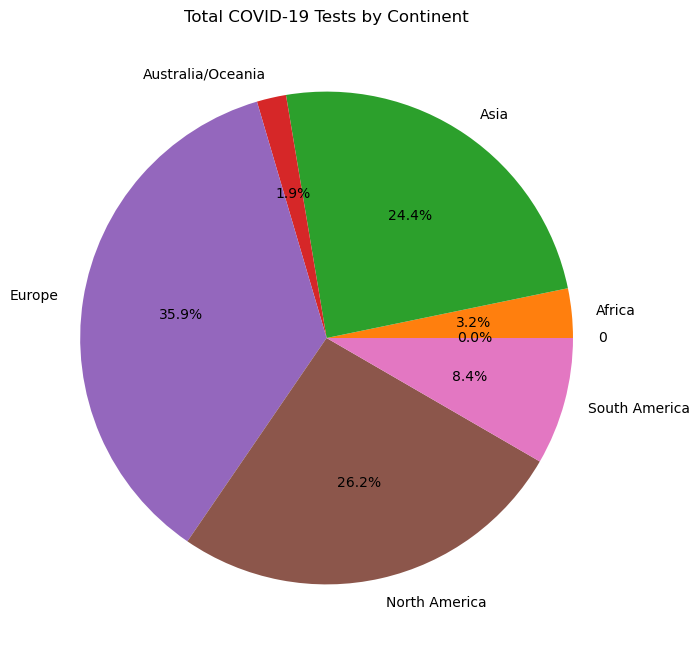

In [45]:
# Group data by Continent and calculate the sum of TotalCases, TotalDeaths, and TotalRecovered
continent_data = world_meter.groupby('Continent').agg({'TotalCases': 'sum', 'TotalDeaths': 'sum', 'TotalRecovered': 'sum', 'TotalTests': 'sum'})

# Plot a pie chart for Total Tests by Continent
plt.figure(figsize=(8, 8))
plt.pie(continent_data['TotalTests'], labels=continent_data.index, autopct='%1.1f%%')
plt.title('Total COVID-19 Tests by Continent')
plt.show()

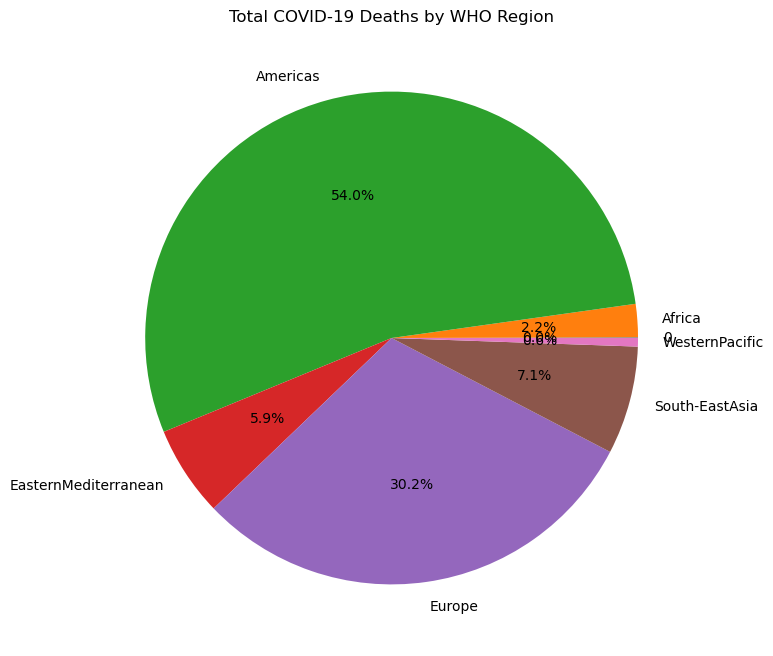

In [46]:
#Comparative Analysis by WHO Region:

# Group data by WHO Region and calculate the sum of TotalCases, TotalDeaths, and TotalRecovered
region_data = world_meter.groupby('WHO Region').agg({'TotalCases': 'sum', 'TotalDeaths': 'sum', 'TotalRecovered': 'sum'})

# Plot a pie chart for TotalDeaths by WHO Region
plt.figure(figsize=(8, 8))
plt.pie(region_data['TotalDeaths'], labels=region_data.index, autopct='%1.1f%%')
plt.title('Total COVID-19 Deaths by WHO Region')
plt.show()

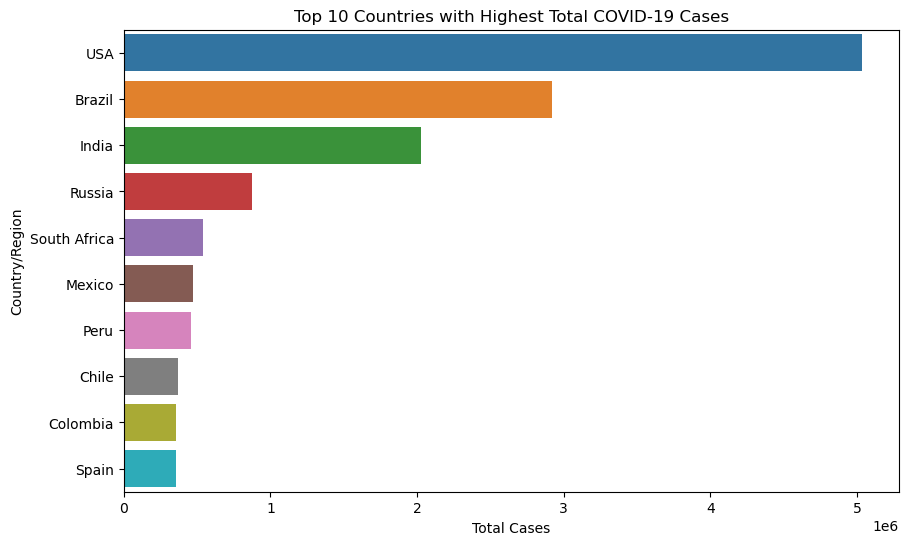

In [47]:
# Bar plot of TotalCases by Country/Region
plt.figure(figsize=(10, 6))
top_countries = world_meter.nlargest(10, 'TotalCases')  # Select top 10 countries by TotalCases
sns.barplot(x='TotalCases', y='Country/Region', data=top_countries)
plt.title('Top 10 Countries with Highest Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country/Region')
plt.show()

Fail to reject the null hypothesis
There is no significant difference between the mean Confirmed cases across different WHO regions.
             WHO Region   TotalDeaths
0                     0     11.720000
1                Africa    330.595745
2              Americas  11015.314286
3  EasternMediterranean   1926.181818
4                Europe   3919.345455
5        South-EastAsia   5062.400000
6        WesternPacific    265.066667


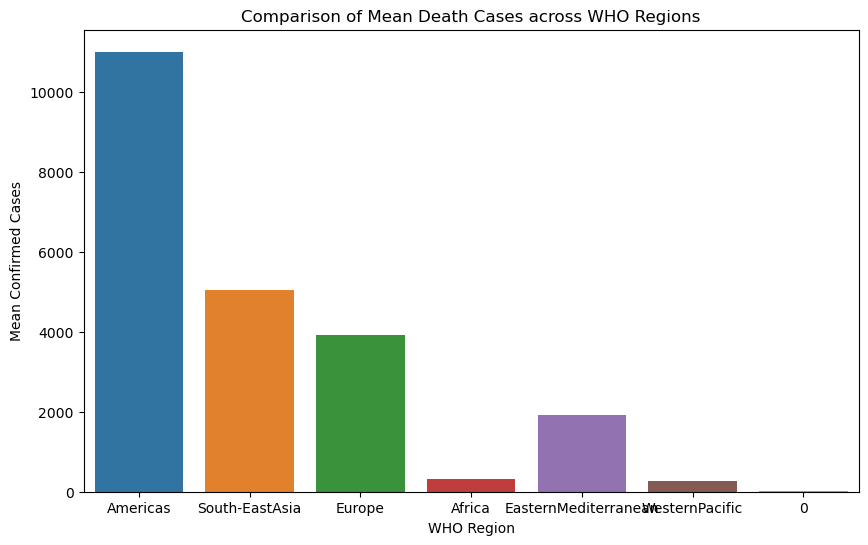

In [48]:
# Perform the one-way ANOVA test
f_statistic, p_value = f_oneway(world_meter['TotalDeaths'][world_meter['WHO Region'] == 'Africa'],
                                world_meter['TotalDeaths'][world_meter['WHO Region'] == 'Europe'],
                                world_meter['TotalDeaths'][world_meter['WHO Region'] == 'EasternMediterranean'],
                                world_meter['TotalDeaths'][world_meter['WHO Region'] == 'Americas'],
                                world_meter['TotalDeaths'][world_meter['WHO Region'] == 'WesternPacific'],
                                world_meter['TotalDeaths'][world_meter['WHO Region'] == 'South-EastAsia'])

# Interpret the results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference between the mean Confirmed cases across different WHO regions.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference between the mean Confirmed cases across different WHO regions.")

# Compare multiple groups
grouped_data = world_meter.groupby('WHO Region')['TotalDeaths'].mean().reset_index()
print(grouped_data)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='WHO Region', y='TotalDeaths', data=world_meter, ci=None)
plt.xlabel('WHO Region')
plt.ylabel('Mean Confirmed Cases')
plt.title('Comparison of Mean Death Cases across WHO Regions')
plt.show()

# 5. Visializations

# Recovered Rate and Mortality Rate

In [49]:
countrywise = pd.pivot_table(world_meter, values = ['TotalCases', 'TotalDeaths','TotalRecovered'],
                            index = 'Country/Region', aggfunc = max)

countrywise['Recovery Rate'] = countrywise['TotalRecovered']*100/countrywise['TotalCases']
countrywise['Mortality Rate'] = countrywise['TotalDeaths']*100/countrywise['TotalCases']
countrywise = countrywise.sort_values(by = 'TotalCases', ascending = False)
countrywise.style.background_gradient(cmap = 'cubehelix')

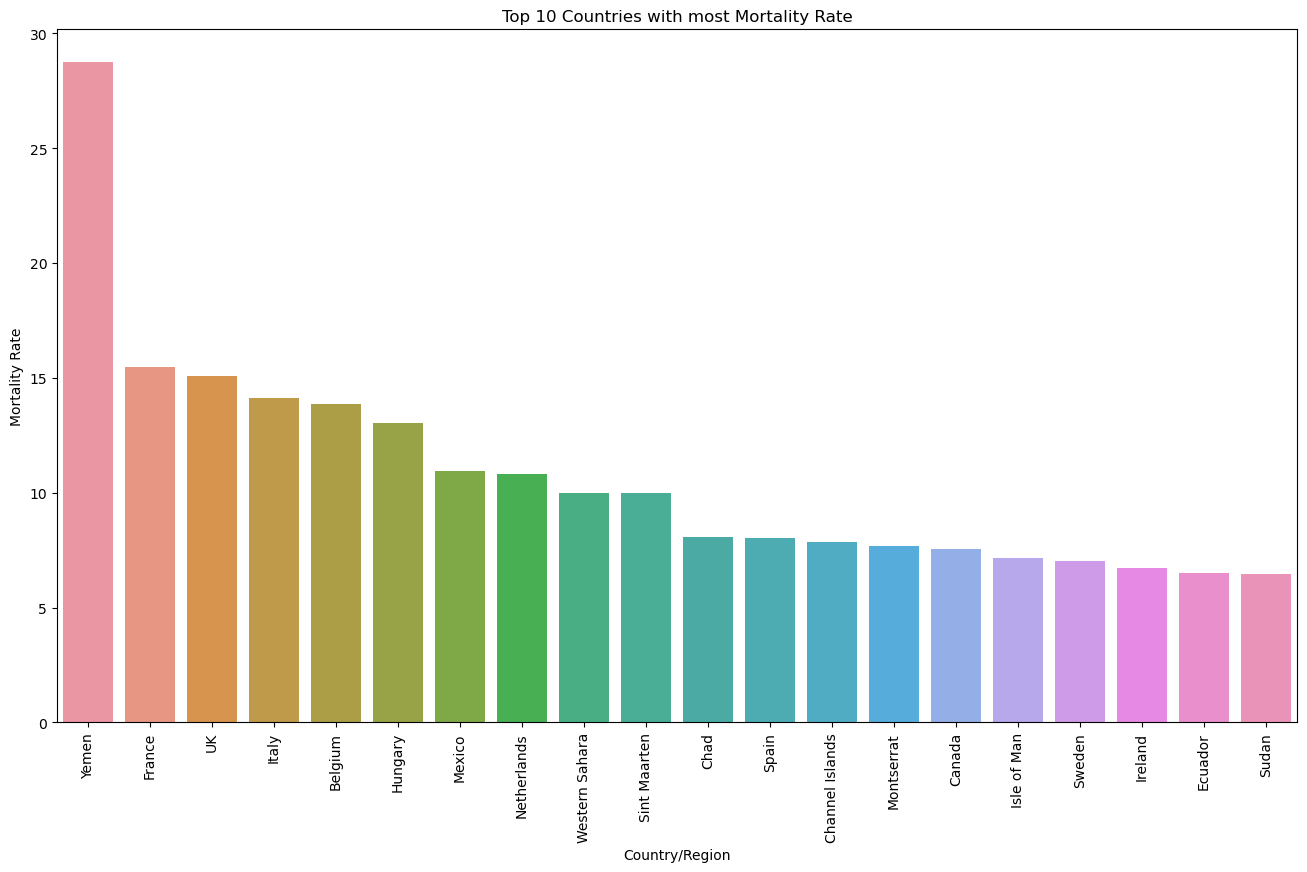

In [50]:
top_10_mortality = countrywise.groupby(by = 'Country/Region').max()[['Mortality Rate']].sort_values(by = ['Mortality Rate'],ascending = False).reset_index()

fig = plt.figure(figsize=(16,9))

top_10_fig = sns.barplot(data = top_10_mortality.iloc[:20], y = 'Mortality Rate', x = 'Country/Region')

plt.title('Top 10 Countries with most Mortality Rate')
plt.xlabel('Country/Region')
plt.ylabel('Mortality Rate')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)


plt.show()

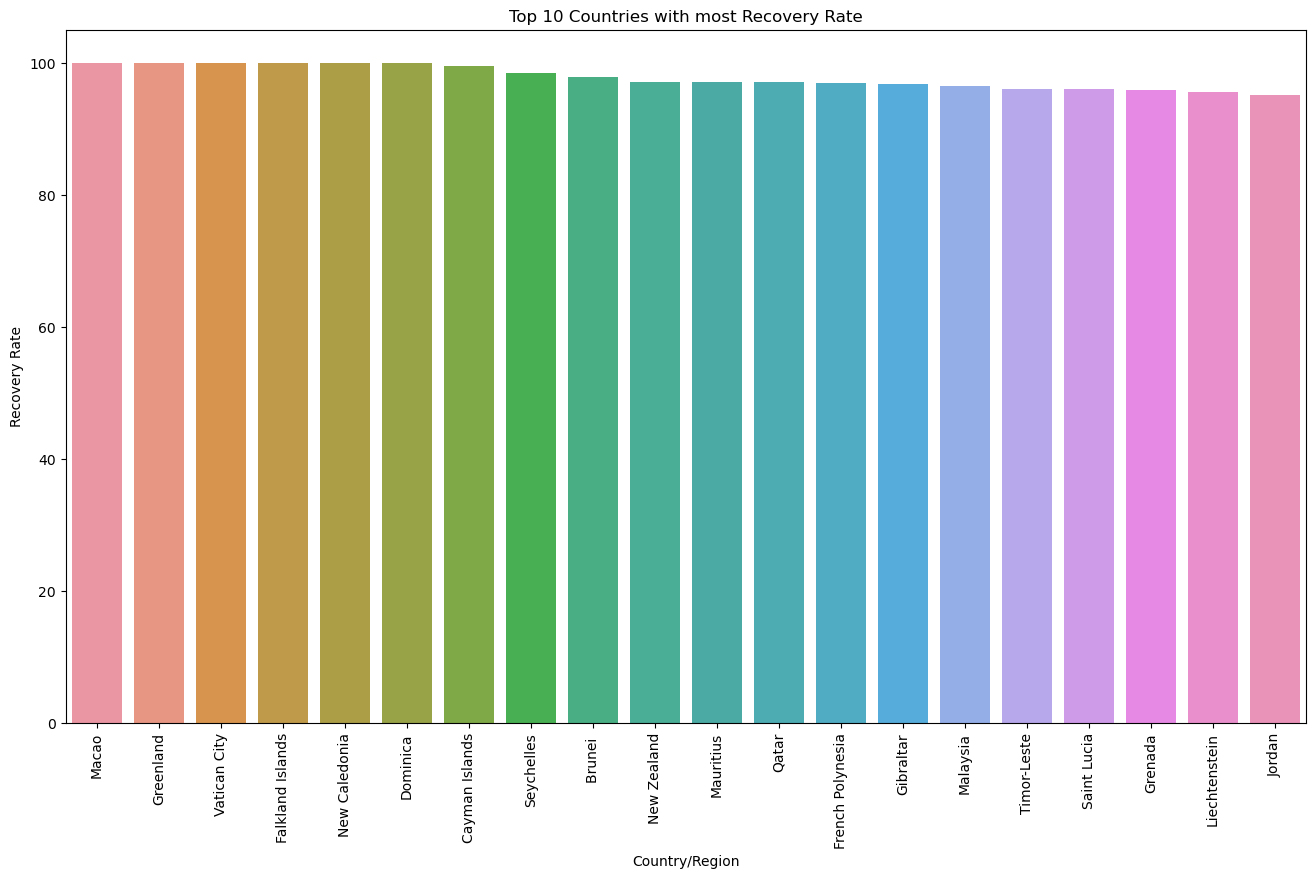

In [51]:
top_10_recovery = countrywise.groupby(by = 'Country/Region').max()[['Recovery Rate']].sort_values(by = ['Recovery Rate'],ascending = False).reset_index()

fig = plt.figure(figsize=(16,9))

top_10_fig = sns.barplot(data = top_10_recovery.iloc[:20], y = 'Recovery Rate', x = 'Country/Region')

plt.title('Top 10 Countries with most Recovery Rate')
plt.xlabel('Country/Region')
plt.ylabel('Recovery Rate')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)


plt.show()

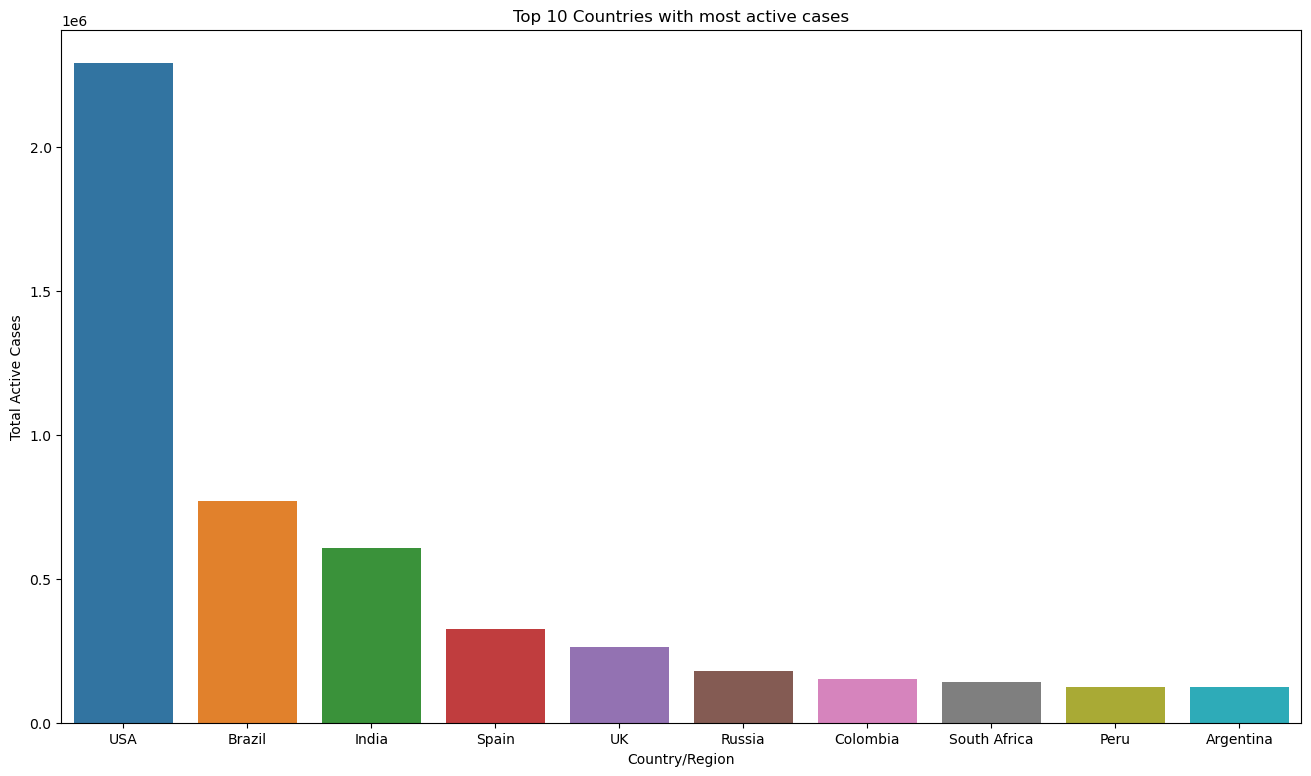

In [315]:
# Top 10 active countries
top_10_active = world_meter.groupby(by = 'Country/Region').max()[['ActiveCases','Continent']].sort_values(by = ['ActiveCases'],ascending = False).reset_index()

fig = plt.figure(figsize=(16,9))

top_10_fig = sns.barplot(data = top_10_active.iloc[:10], y = 'ActiveCases', x = 'Country/Region')

plt.title('Top 10 Countries with most active cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Active Cases')
plt.show()

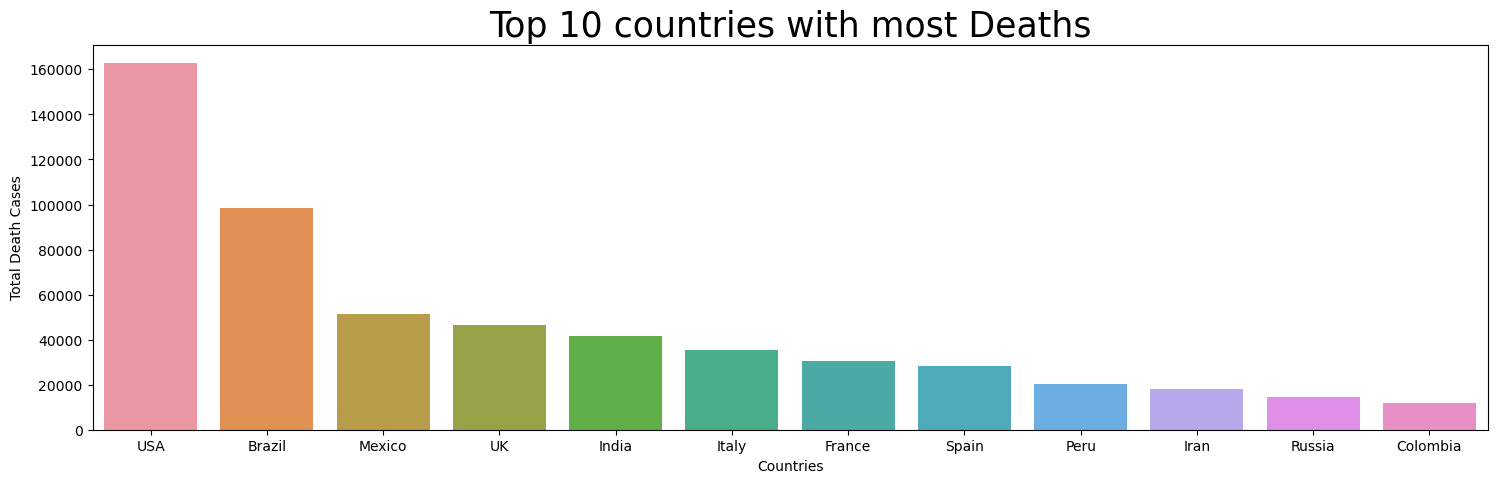

In [316]:
#Top countries with highest deaths
top_10_deaths = world_meter.groupby(by = 'Country/Region').max()[['TotalDeaths','Population']].sort_values(by = ['TotalDeaths'], ascending = False).reset_index()

fig = plt.figure(figsize = (18,5))

plt.title("Top 10 countries with most Deaths", size = 25)

ax = sns.barplot(data = top_10_deaths[:12], y = "TotalDeaths", x = "Country/Region")

plt.xlabel("Countries")
plt.ylabel("Total Death Cases")
plt.show()

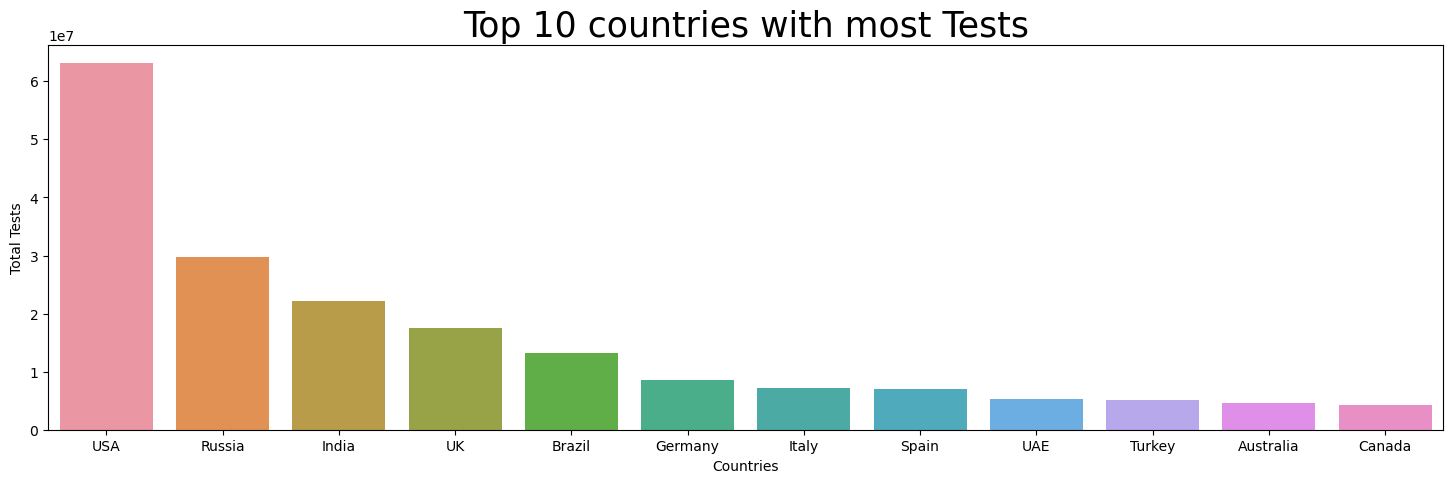

In [317]:
#Top countries with highest test
top_10_deaths = world_meter.groupby(by = 'Country/Region').max()[['TotalTests','Population']].sort_values(by = ['TotalTests'], ascending = False).reset_index()

fig = plt.figure(figsize = (18,5))

plt.title("Top 10 countries with most Tests", size = 25)

ax = sns.barplot(data = top_10_deaths[:12], y = "TotalTests", x = "Country/Region")

plt.xlabel("Countries")
plt.ylabel("Total Tests")
plt.show()

In [318]:
# Total cases by continent
cases_by_continent = world_meter.groupby('Continent')['TotalCases'].sum()
print(cases_by_continent)

# Total deaths by WHO region
deaths_by_region = world_meter.groupby('WHO Region')['TotalDeaths'].sum()
print(deaths_by_region)

# Countries with the highest number of active cases
top_active_cases = world_meter.nlargest(10, 'ActiveCases')
print(top_active_cases)



Continent
0                        712.0
Africa               1011867.0
Asia                 4689814.0
Australia/Oceania      21735.0
Europe               2982576.0
North America        5925829.0
South America        4544555.0
Name: TotalCases, dtype: float64
WHO Region
0                          293.0
Africa                   15538.0
Americas                385536.0
EasternMediterranean     42376.0
Europe                  215564.0
South-EastAsia           50624.0
WesternPacific            3976.0
Name: TotalDeaths, dtype: float64
   Country/Region      Continent    Population  TotalCases  TotalDeaths  \
0             USA  North America  3.311981e+08   5032179.0     162804.0   
1          Brazil  South America  2.127107e+08   2917562.0      98644.0   
2           India           Asia  1.381345e+09   2025409.0      41638.0   
9           Spain         Europe  4.675665e+07    354530.0      28500.0   
11             UK         Europe  6.792203e+07    308134.0      46413.0   
3          Rus

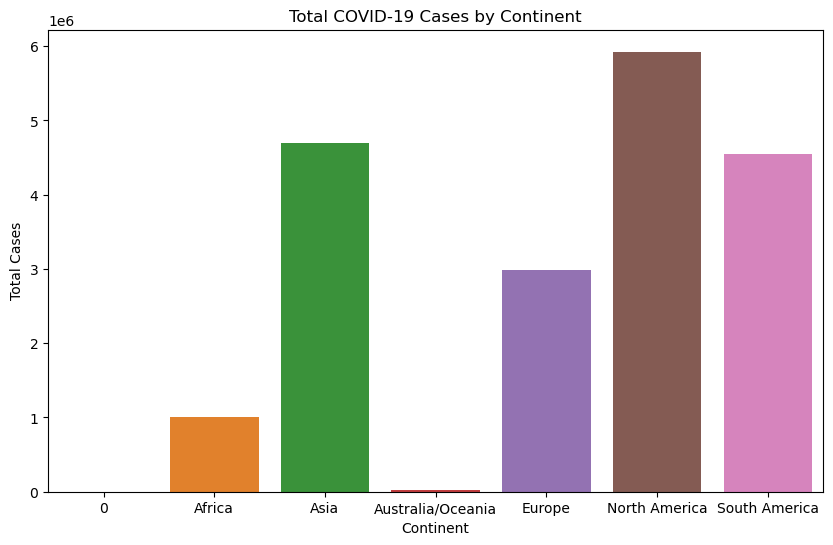

In [319]:
# Visualization - Total cases by continent
plt.figure(figsize=(10, 6))
sns.barplot(x=cases_by_continent.index, y=cases_by_continent.values)
plt.title('Total COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.show()

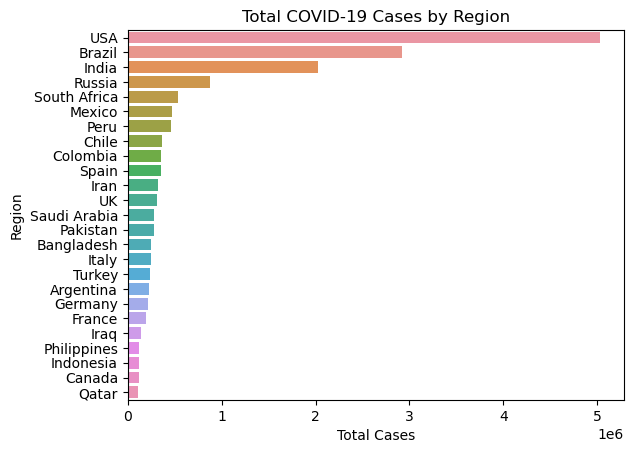

In [320]:
filtered_df = world_meter[world_meter['TotalCases'] > 100000]
# Group the data by region and calculate the total cases
region_cases = filtered_df.groupby('Country/Region')['TotalCases'].sum().reset_index()

# Sort the regions by the total cases in descending order
region_cases = region_cases.sort_values('TotalCases', ascending=False)

# Create a bar plot of total cases by region
sns.barplot(x='TotalCases', y='Country/Region', data=region_cases)
plt.xlabel('Total Cases')
plt.ylabel('Region')
plt.title('Total COVID-19 Cases by Region')
plt.show()

# Dataset 3

# Country Wise Covid 19 Dataset.

This is Country Wise Latest Dataset of Covid 19 which include Country/Region, Total numbers of Confirmed Case, Deaths, Recovered Cases, Who Region and so on.

For this covid 19 dataset, 
Explatory Data Analysis,
Outlier Analysis,
Checking distribution of continuous coloumns using histogram,
Correlation Matrix,
Data Insight, and 
Using Scatter Plot for Visializations are included

In [1]:
## Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing dataset
file_path = '/Users/hannwenyein/Downloads/archive/country_wise_latest.csv'
df = pd.read_csv(file_path)
df.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [3]:
summary = df.describe()
summary

Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635            3.454302              26.287694   
min       0.000000       0.000000            0.000000               0.000000   
25%       0.000000       0.000000            0.945000              48.770000   
50%       1.000000      22.000000            2.150000              71.320000   
75%       6.000000     221.000000            3.875000              86.885000   
max    1076.000000   33728.000000           28.560000             100.000000   

       Deaths / 100 Recovered  Confirmed last week  1 week change  \
count                  187.00         1.870000e+02     187.000000   
mean                      inf         7.868248e+04    9448.459893   
std                       NaN         3.382737e+05   47491.127684   
min                      0.00         1.000000e+01     -47.000000   
25%                      1.45         1.051500e+03      49.000000   
50%                      3.62         5.020000e+03     432.000000   
75%                      6.44         3.708050e+04    3172.000000   
max                       inf         3.834677e+06  455582.000000   

       1 week % increase  
count         187.000000  
mean           13.606203  
std            24.509838  
min            -3.840000  
25%             2.775000  
50%             6.890000  
75%            16.855000  
max           226.320000

In [4]:
# Get the variable types of each column
variable_types = df.dtypes

print(variable_types)

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object


In [5]:
# Check for null values in each column
null_values = df.isnull().sum()

# Check for NaN values in each column
nan_values = df.isna().sum()

print("Null values:")
print(null_values)
print("\nNaN values:")
print(nan_values)

Null values:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

NaN values:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


# Explatory Data Analysis:

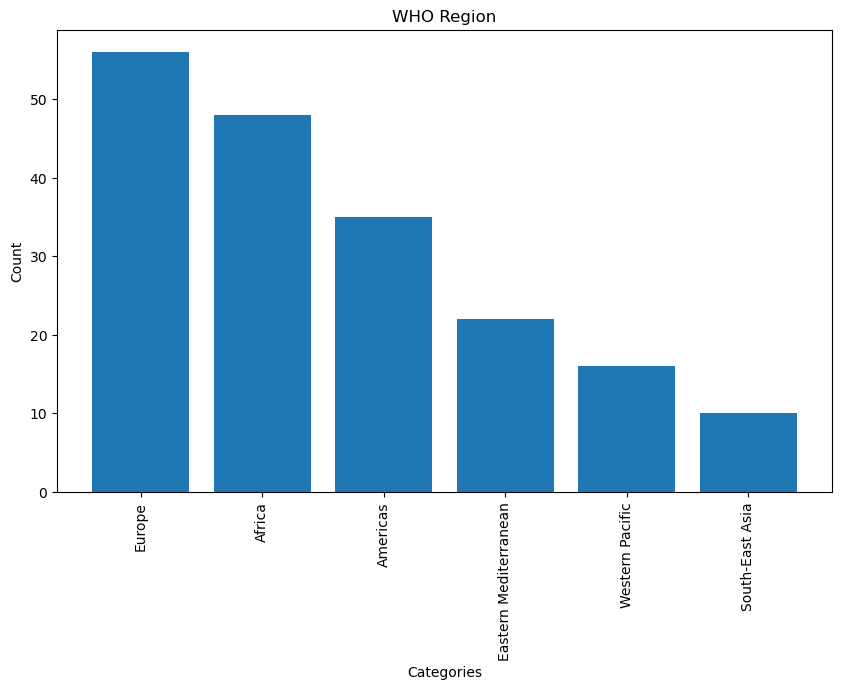

In [6]:
# Assuming you already have the DataFrame 'df'

# Select the categorical columns
categorical_columns = ['WHO Region',]


# Plot bar plots for each categorical column
for column in categorical_columns:
    # Count the occurrences of each unique value in the column
    value_counts = df[column].value_counts()
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index, value_counts.values)
    plt.title(column)
    plt.xlabel("Categories")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

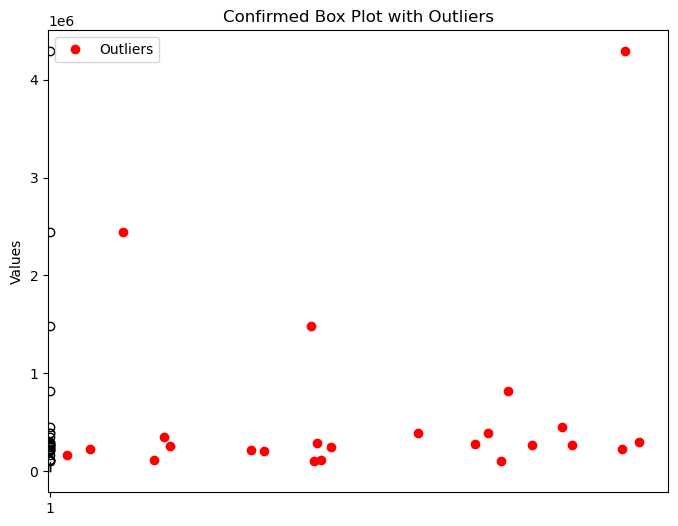

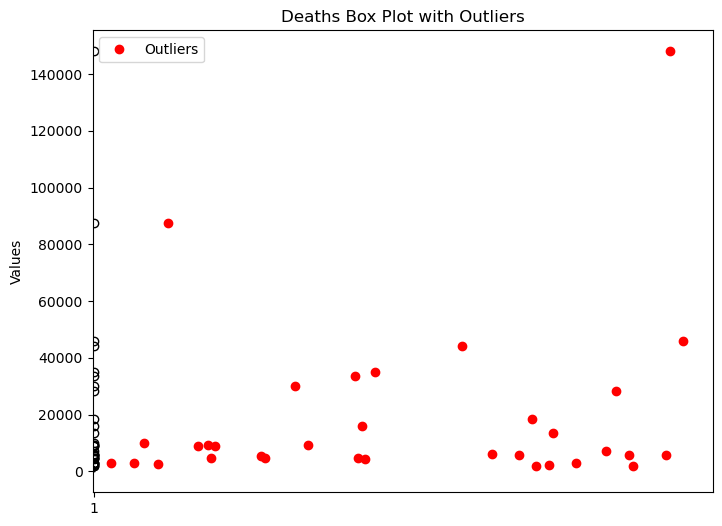

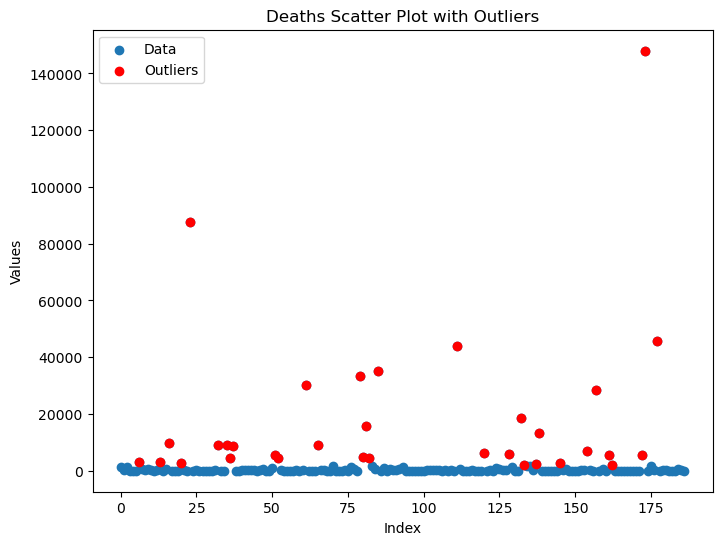

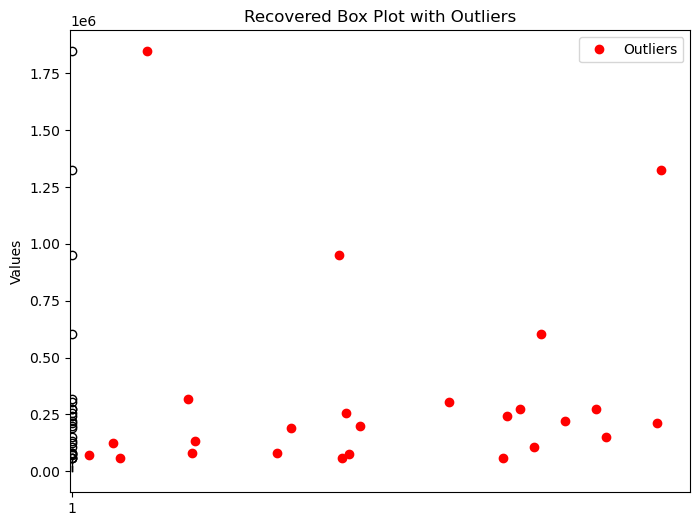

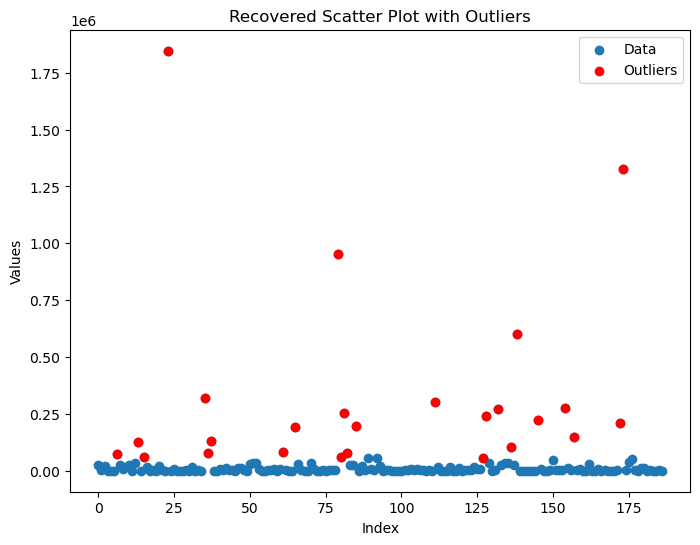

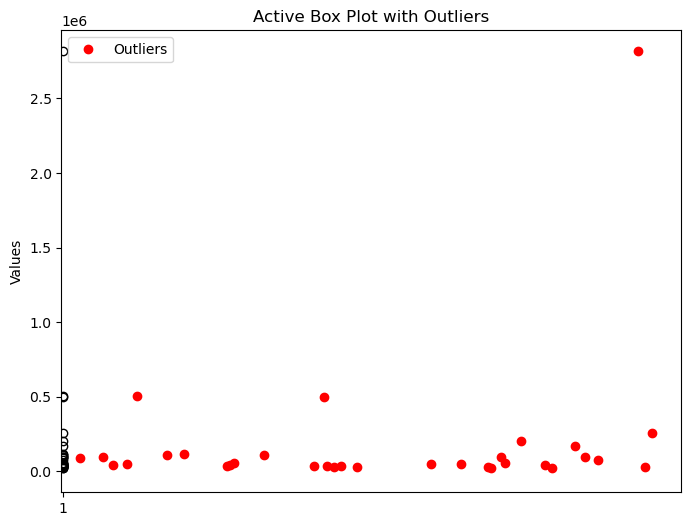

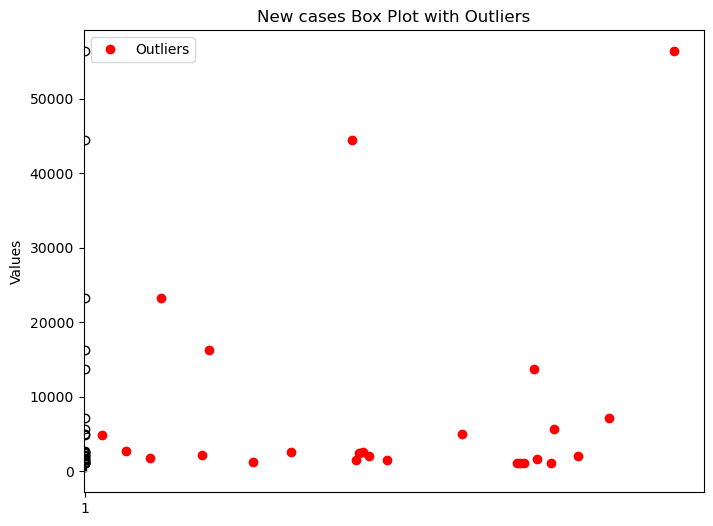

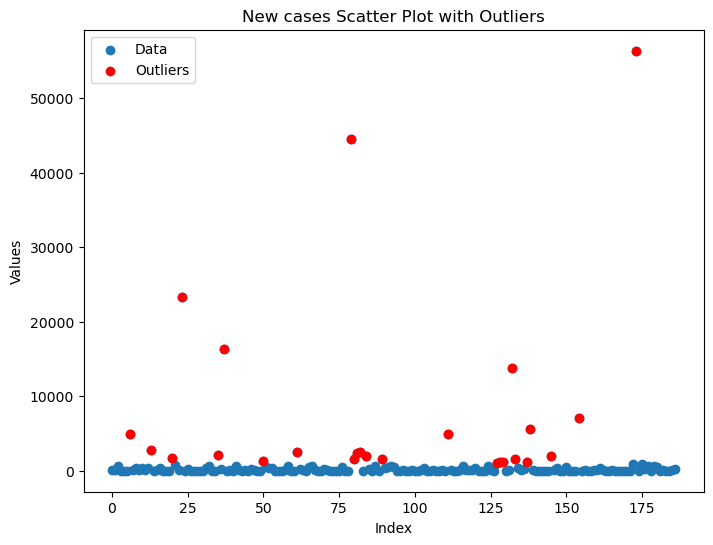

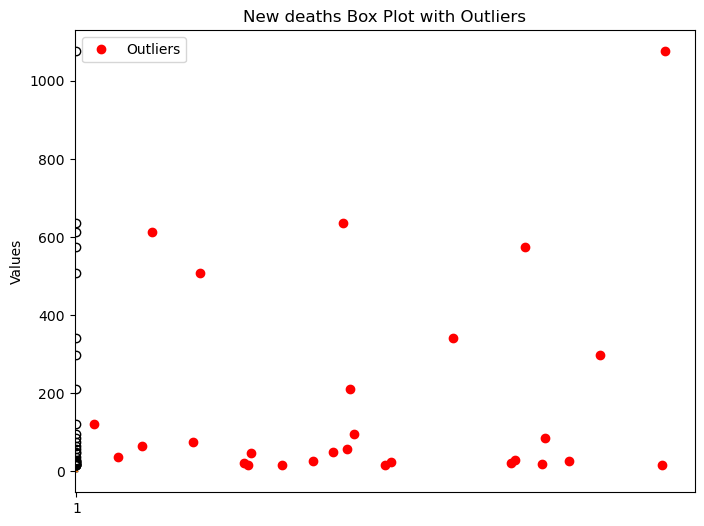

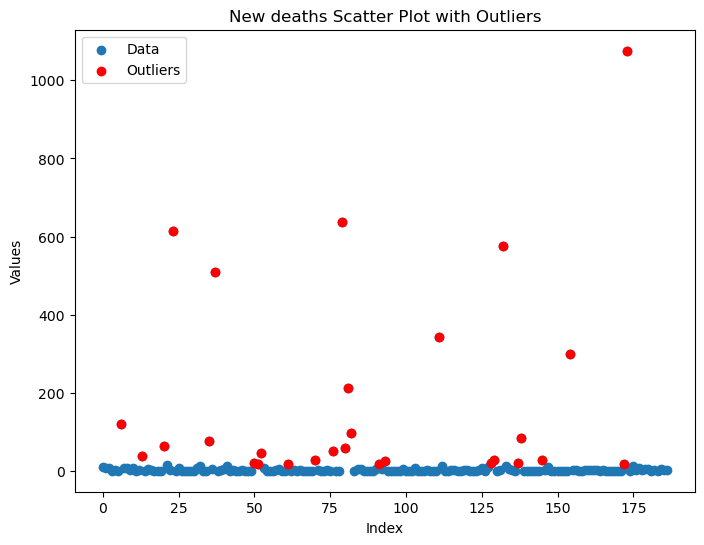

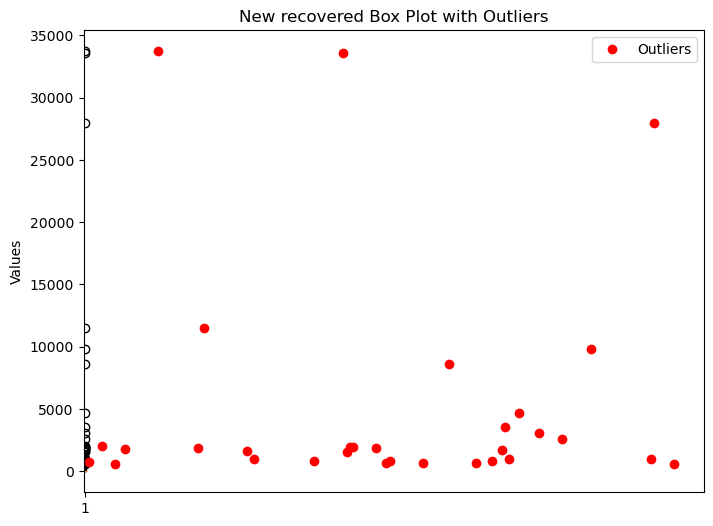

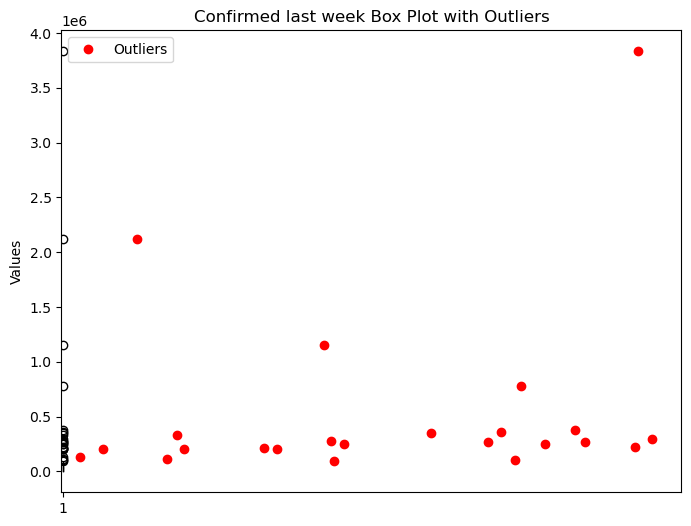

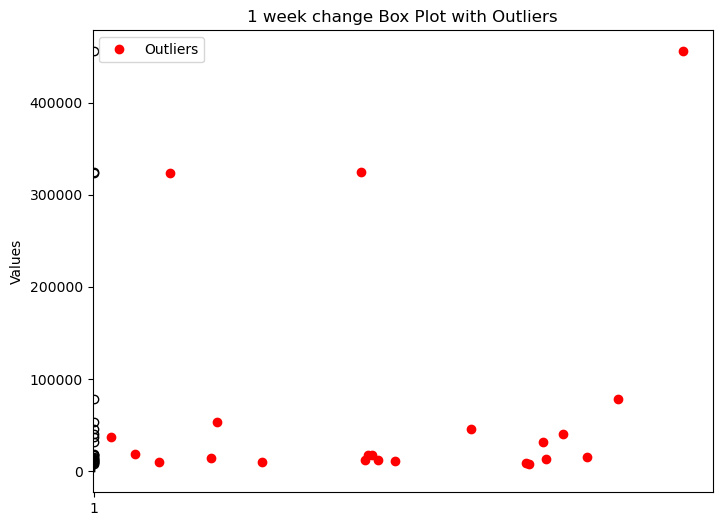

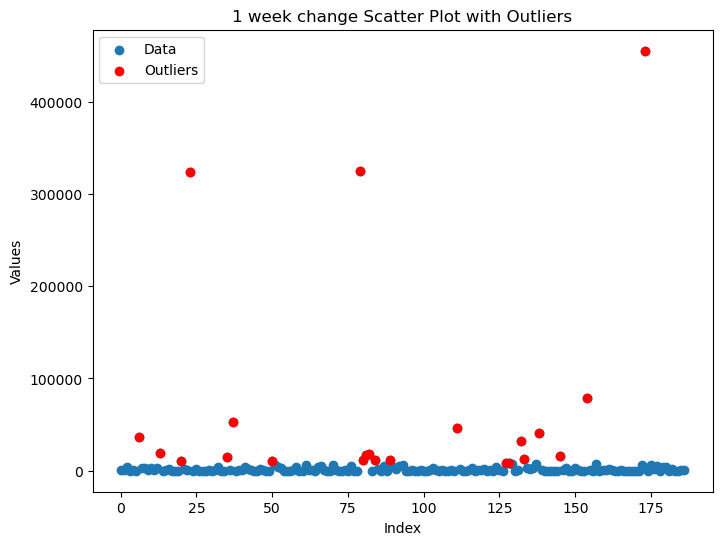

In [7]:
## Identifying Outliers

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame 'df'

# Select all integer columns
integer_columns = df.select_dtypes(include='integer').columns.tolist()

# Perform outlier analysis and visualize with box plots and scatter plots
for column in integer_columns:
    # Calculate the interquartile range (IQR)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Plot box plot with outliers highlighted
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.plot(outliers.index, outliers[column], 'ro', label='Outliers')
    plt.title(column + " Box Plot with Outliers")
    plt.ylabel("Values")
    plt.legend()
    plt.show()
    
    # Plot scatter plot to visualize outliers
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[column], label='Data')
    plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    plt.title(column + " Scatter Plot with Outliers")
    plt.xlabel("Index")
    plt.ylabel("Values")
    plt.legend()
    plt.show()


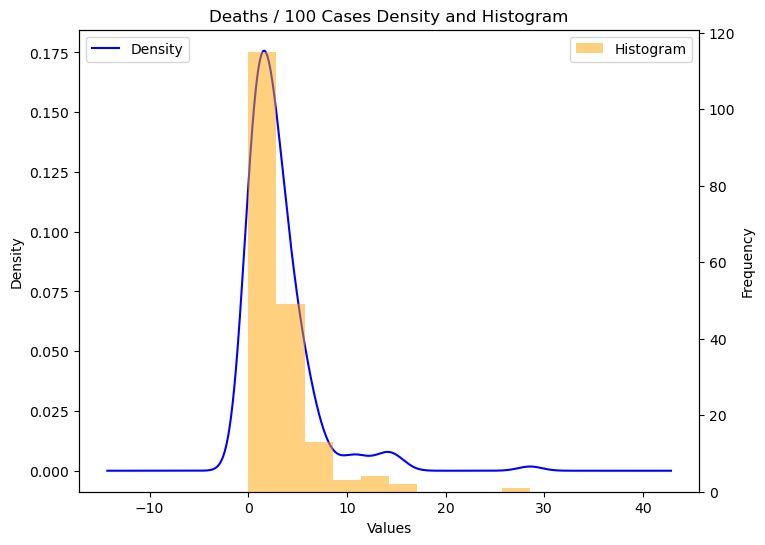

In [329]:
# Checking distribution of continuous coloumns

# Select the float columns
float_columns = ['Deaths / 100 Cases','Recovered / 100 Cases']

# Plot histograms for each float column
for column in float_columns:
    # Create subplots with twin y-axis
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax2 = ax1.twinx()
    
    # Plot density
    df[column].plot.density(ax=ax1, label='Density', color='blue')
    ax1.set_ylabel('Density')
    
    # Plot histogram
    df[column].plot.hist(ax=ax2, bins=10, alpha=0.5, label='Histogram', color='orange')
    ax2.set_ylabel('Frequency')
    
    # Set titles and labels
    ax1.set_title(column + " Density and Histogram")
    ax1.set_xlabel("Values")
    
    # Display legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # Show the plot
    plt.show()

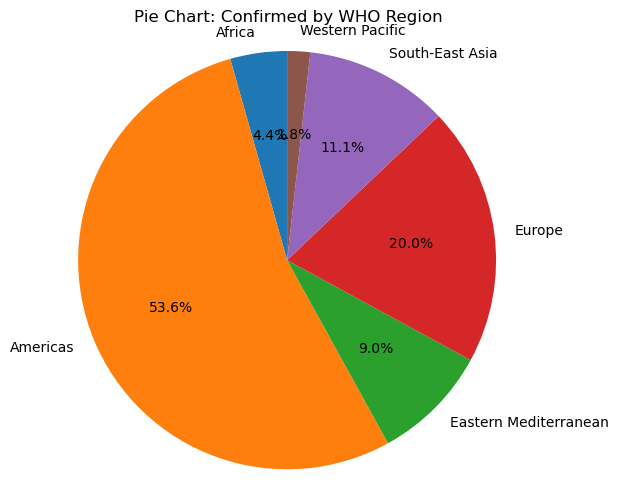

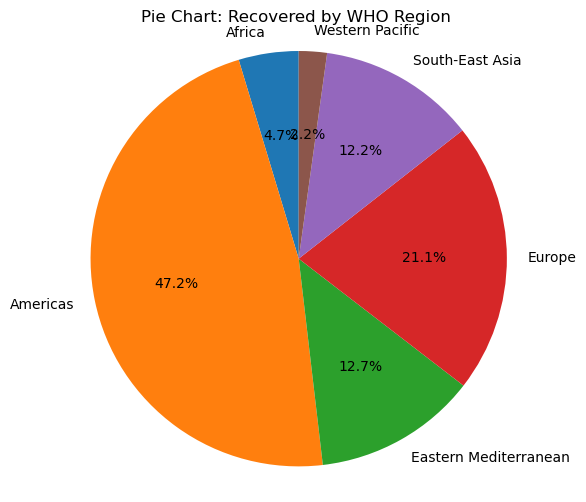

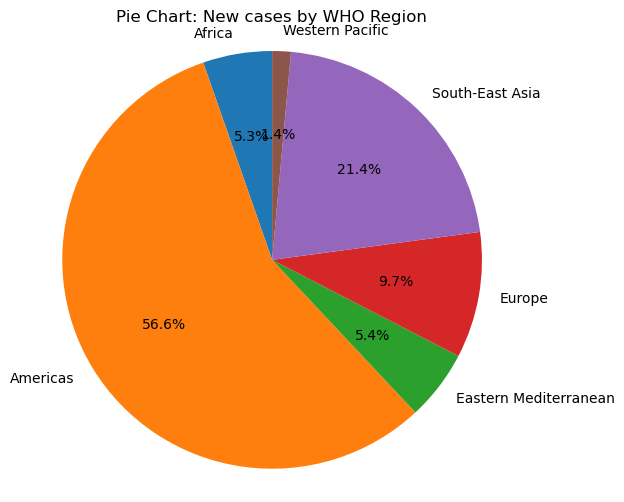

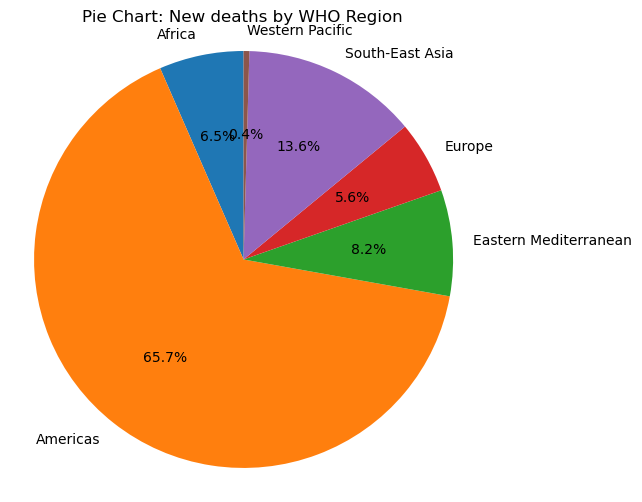

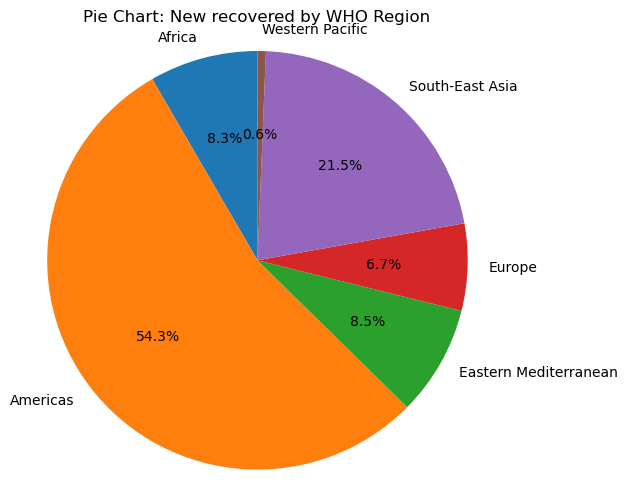

In [330]:
# Columns to plot
columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']

# Iterate over the columns
for column in columns:
    # Group the data by WHO region and calculate the sum of each column
    grouped_data = df.groupby('WHO Region')[column].sum()
    
    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart: {column} by WHO Region')
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    
    # Show the plot
    plt.show()

In [331]:
## Correlation Matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame 'df'

# Select all integer and float columns
numeric_columns = df.select_dtypes(include=['integer', 'float'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

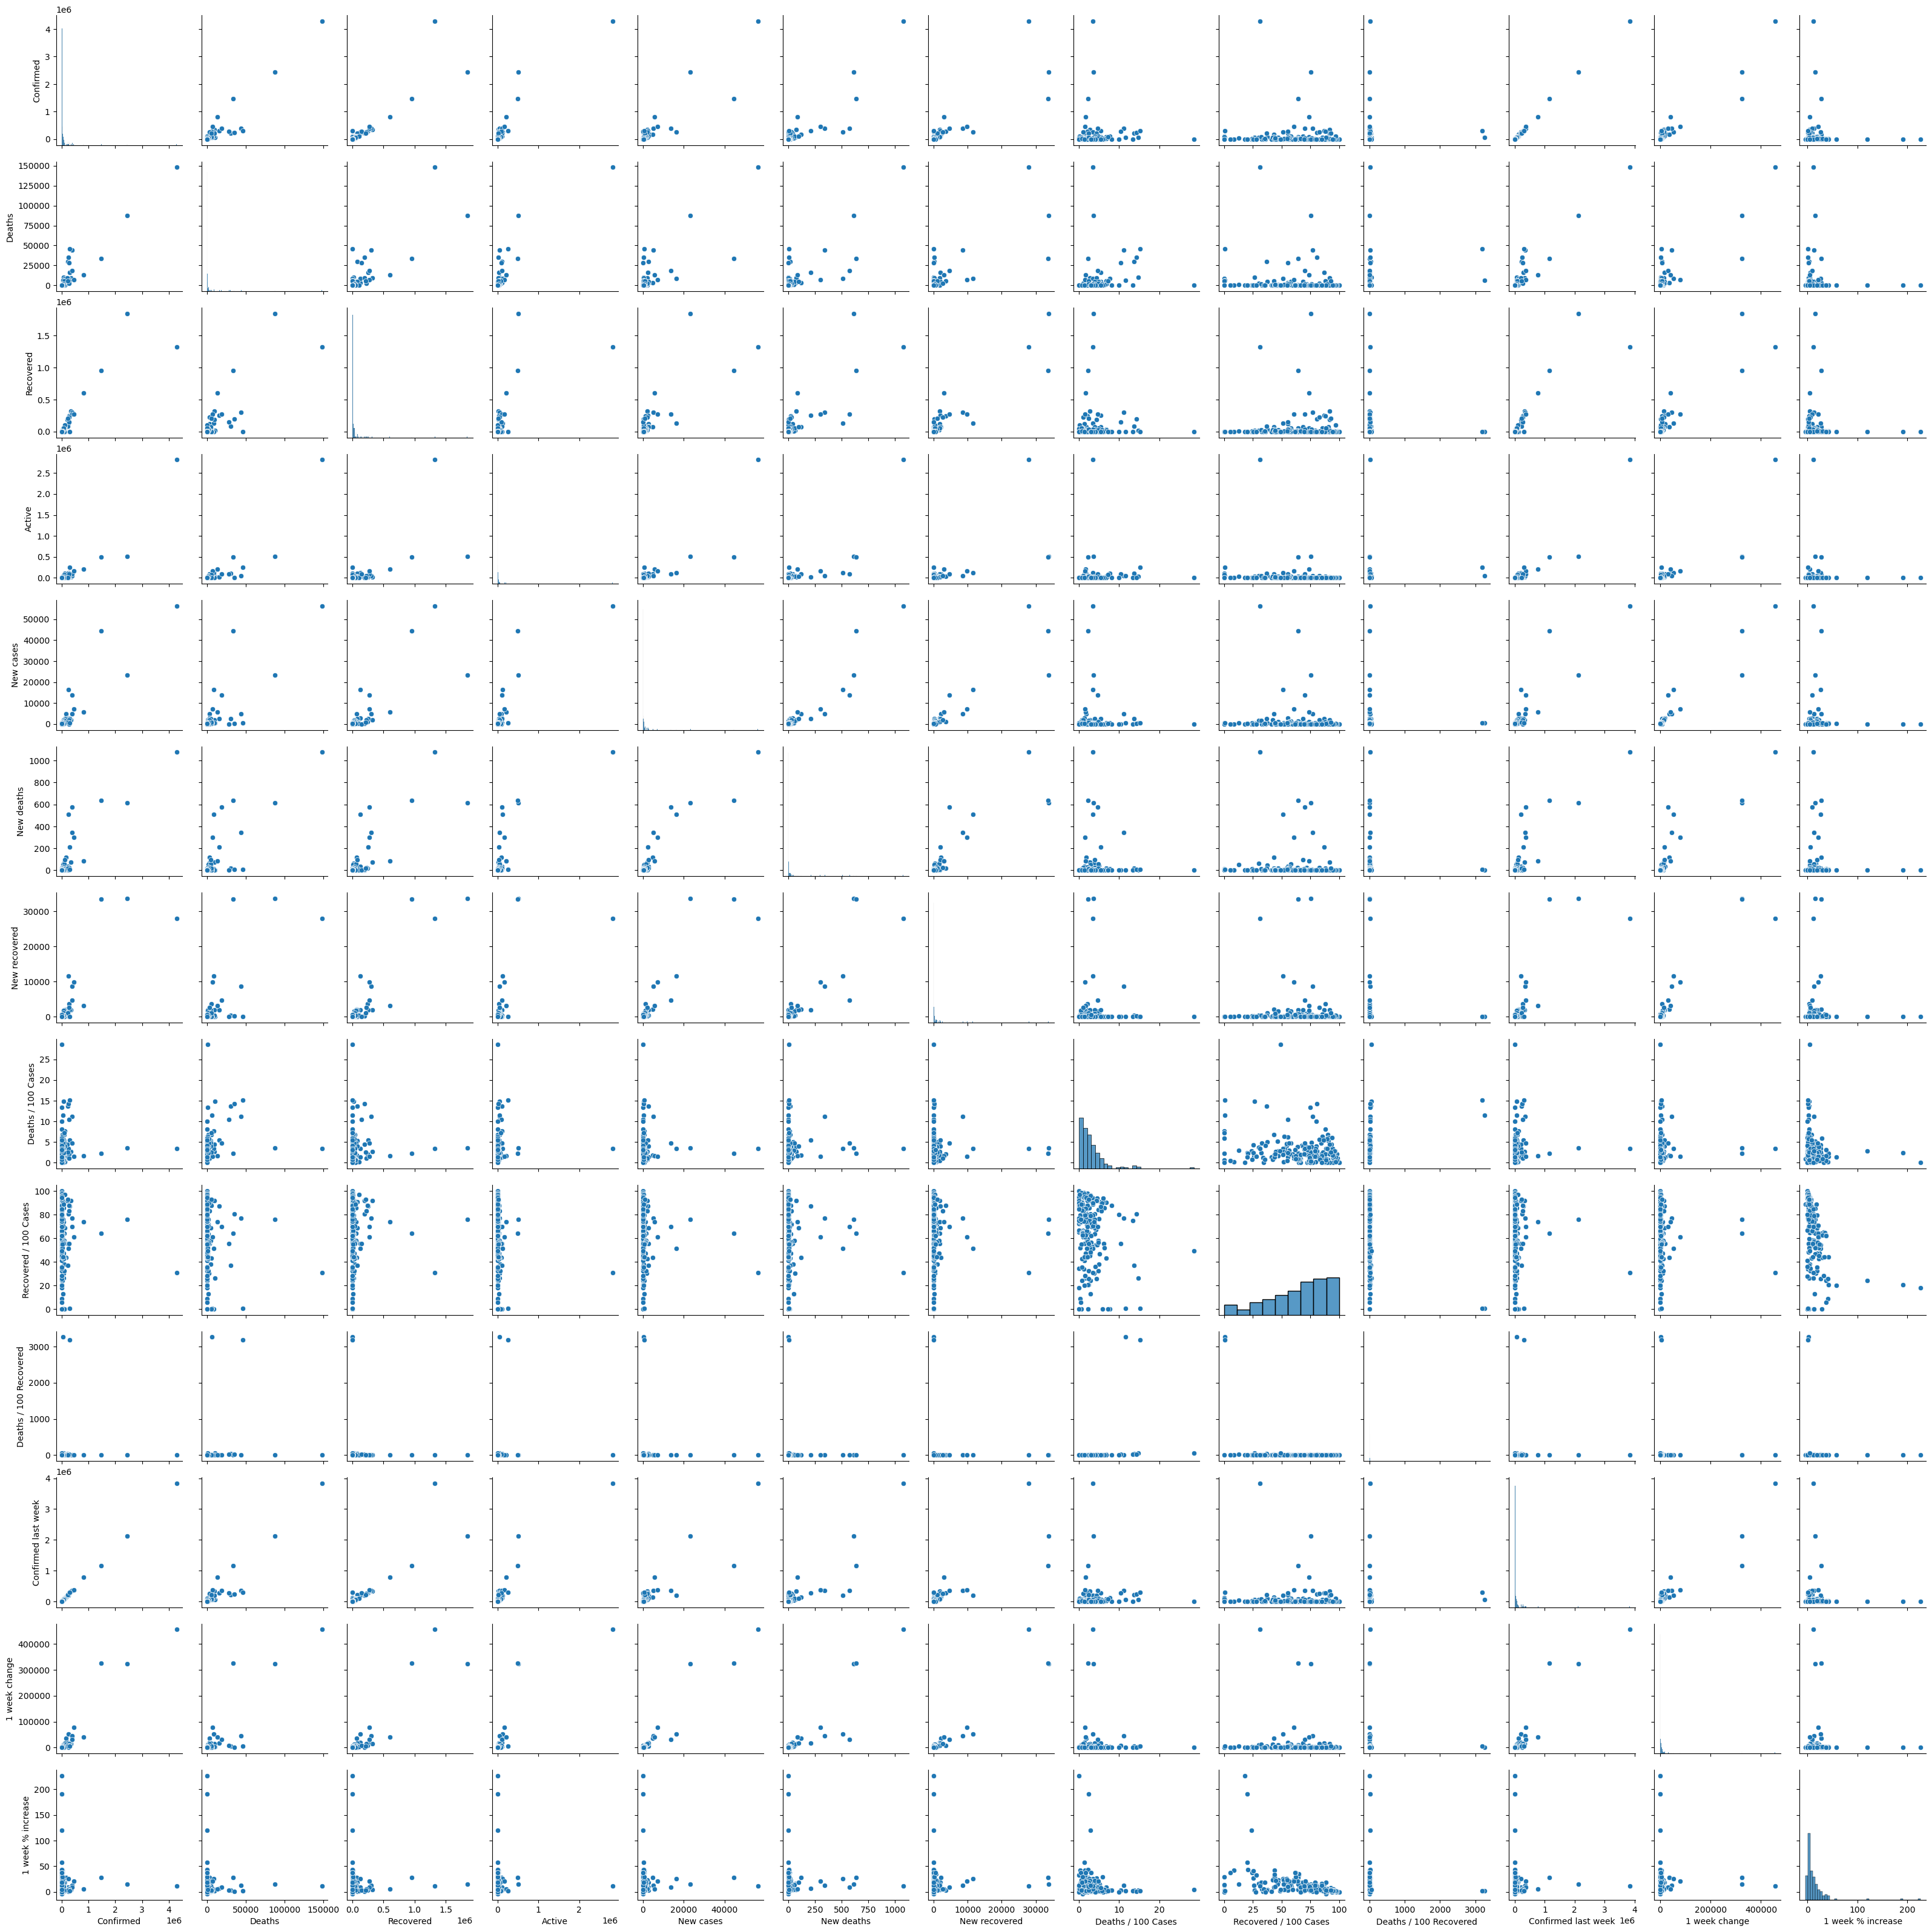

In [332]:
# Select all numeric columns
numeric_columns = df.select_dtypes(include=['integer', 'float'])

# Plot scatter plot matrix
sns.pairplot(numeric_columns)
plt.show()

# Data Insights

In [333]:
# Calculate recovery rate
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100

# Group by WHO Region and calculate average recovery rate
recovery_by_region = df.groupby('WHO Region')['Recovery Rate'].mean().reset_index()

# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=recovery_by_region, x='Recovery Rate', y='WHO Region')
plt.xlabel('Recovery Rate')
plt.ylabel('WHO Region')
plt.title('Average Recovery Rate by WHO Region')
plt.show()

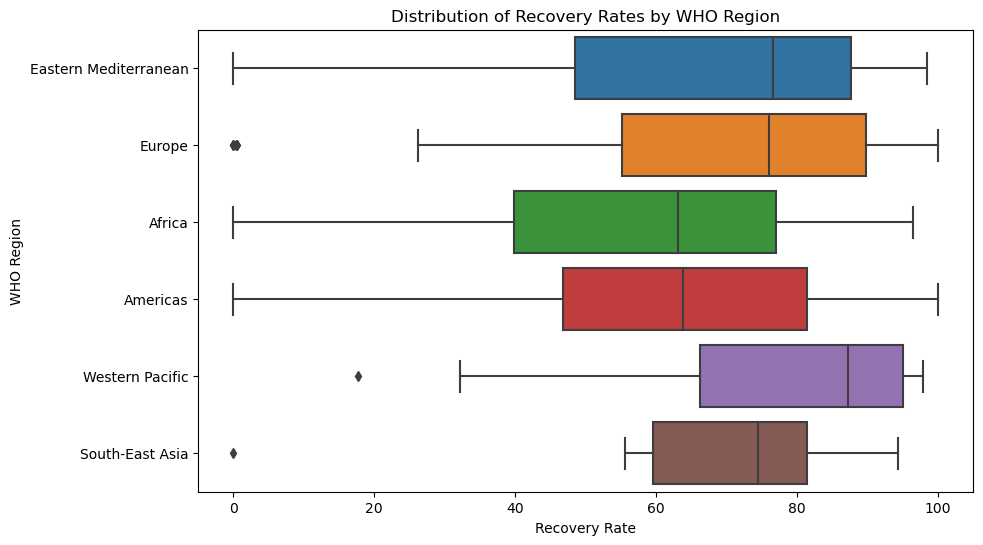

In [334]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Recovery Rate', y='WHO Region')
plt.xlabel('Recovery Rate')
plt.ylabel('WHO Region')
plt.title('Distribution of Recovery Rates by WHO Region')
plt.show()

In [335]:
# Group the data by WHO Region
grouped_by_region = df.groupby('WHO Region')

# Calculate the average values of the columns by region
average_by_region = grouped_by_region[['Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered']].mean().reset_index()

# Create subplots for each column
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot Deaths / 100 Cases
sns.barplot(data=average_by_region, x='WHO Region', y='Deaths / 100 Cases', ax=axes[0])
axes[0].set_xlabel('WHO Region')
axes[0].set_ylabel('Deaths / 100 Cases')
axes[0].set_title('Average Deaths / 100 Cases by WHO Region')

# Plot Recovered / 100 Cases
sns.barplot(data=average_by_region, x='WHO Region', y='Recovered / 100 Cases', ax=axes[1])
axes[1].set_xlabel('WHO Region')
axes[1].set_ylabel('Recovered / 100 Cases')
axes[1].set_title('Average Recovered / 100 Cases by WHO Region')

# Plot Deaths / 100 Recovered
sns.barplot(data=average_by_region, x='WHO Region', y='Deaths / 100 Recovered', ax=axes[2])
axes[2].set_xlabel('WHO Region')
axes[2].set_ylabel('Deaths / 100 Recovered')
axes[2].set_title('Average Deaths / 100 Recovered by WHO Region')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [336]:
# Set the data for the scatter plot
x = df['Deaths / 100 Cases']
y = df['Recovered / 100 Cases']
bubble_size = df['Active']
region_colors = {'Africa': 'red', 'Americas': 'green', 'Eastern Mediterranean': 'blue',
                 'Europe': 'purple', 'South-East Asia': 'orange', 'Western Pacific': 'cyan'}
colors = [region_colors[region] for region in df['WHO Region']]  # Color each bubble based on WHO region

# Rescale the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 10000))
x_scaled = scaler.fit_transform(x.values.reshape(-1, 1))
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
bubble_size_scaled = scaler.fit_transform(bubble_size.values.reshape(-1, 1))

# Create the scatter plot with colored bubbles
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled, y_scaled, s=bubble_size_scaled, c=colors, alpha=0.5)

# Set the axis labels and plot title
plt.xlabel('Deaths / 100 Cases (Scaled)')
plt.ylabel('Recovered / 100 Cases (Scaled)')
plt.title('Scatter Bubble Plot: Deaths / 100 Cases vs. Recovered / 100 Cases')

# Add legend for WHO regions
for region, color in region_colors.items():
    plt.scatter([], [], color=color, label=region)
plt.legend(title='WHO Region')

# Show the plot
plt.show()

# Dataset 4

# Covid_19_clean_complete 19 Dataset.


This dataset contains information about the COVID-19 pandemic from January to June 2022. The dataset has 10 columns including Province/State, Country/Region, Latitude, Longitude, Date, Confirmed, Deaths, Recovered, Active, and WHO Region. The dataset is intended to be used for data analysis and visualization to understand the spread and impact of COVID-19 across different regions of the world.

The Province/State column specifies the province or state where the COVID-19 cases are reported, while the Country/Region column specifies the country where the cases were recorded. The Latitude and Longitude columns provide the geographic location of each province or state. These attributes are important for visualizing the areas where COVID-19 cases are prevalent.

The Date column provides the date when each COVID-19 case was recorded. This allows for tracking the progression of the pandemic over time and the visualization of trends in the spread of COVID-19.

The Confirmed, Deaths, and Recovered columns show the number of confirmed COVID-19 cases, deaths, and recoveries, respectively. These columns are crucial for visualizing the impact of the pandemic on different regions and the severity of the outbreak.

The Active column provides information on the number of currently active COVID-19 cases. This column is essential for visualizing the progression of the pandemic and the current state of each region.

Finally, the WHO Region column specifies the World Health Organization region in which the country or province is located. This attribute is useful for visualizing the impact of COVID-19 across different regions and the effectiveness of different responses to the pandemic.

In summary, this dataset contains comprehensive information on COVID-19 cases from January to June 2022, and it is intended to be used for data analysis and visualization. The dataset provides valuable insights into the spread and impact of COVID-19 across different regions of the world, allowing for the identification of trends and the visualization of the effectiveness of different pandemic responses.

In [10]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/Users/hannwenyein/Downloads/archive/covid_19_clean_complete.csv')

# checking the data 
df.head(5)

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

# Cleaning the data

In [12]:
# Getting the number of rows and columns
num_rows, num_cols = df.shape

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 49068
Number of columns: 10


In [13]:
# checking the fist few rows in the dataframe
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

# Handling Missing Valuse

In [14]:
# finding the number of missing values in the dataframe

# List of columns
columns = ['Province/State','Lat','Long','Date','Country/Region','Confirmed','Deaths','Recovered','Active','WHO Region']

# Loop through columns and print name and number of missing values
print('Number of missing values in each columns')
for col in columns:
    missing_count = df[col].isna().sum()
    print(f"{col}: {missing_count}")

Number of missing values in each columns
Province/State: 34404
Lat: 0
Long: 0
Date: 0
Country/Region: 0
Confirmed: 0
Deaths: 0
Recovered: 0
Active: 0
WHO Region: 0


Upon a preliminary inspection of the dataset, it was observed that some Province/State 
values were not included. As a result, the Province/State column will be removed from 
the data for the purpose of analysis. Additionally, it was noted that the number of 
missing Province/State values is 34,403 out of a total of 49,068 rows. This represents 
approximately 70.23% of the total dataset, indicating a significant amount of missing data in this column
This indicates a significant number of missing entries, and hence, 
the decision has been made to remove the Province/State column from the dataset for the purpose of the analysis.

In [15]:
# Remove a column named "column_to_remove"
df = df.drop(columns=["Province/State"])

# checking the new dataframe
df

Country/Region        Lat       Long        Date  Confirmed  \
0                Afghanistan  33.939110  67.709953  2020-01-22          0   
1                    Albania  41.153300  20.168300  2020-01-22          0   
2                    Algeria  28.033900   1.659600  2020-01-22          0   
3                    Andorra  42.506300   1.521800  2020-01-22          0   
4                     Angola -11.202700  17.873900  2020-01-22          0   
...                      ...        ...        ...         ...        ...   
49063  Sao Tome and Principe   0.186400   6.613100  2020-07-27        865   
49064                  Yemen  15.552727  48.516388  2020-07-27       1691   
49065                Comoros -11.645500  43.333300  2020-07-27        354   
49066             Tajikistan  38.861000  71.276100  2020-07-27       7235   
49067                Lesotho -29.610000  28.233600  2020-07-27        505   

       Deaths  Recovered  Active             WHO Region  
0           0          0       0  Eastern Mediterranean  
1           0          0       0                 Europe  
2           0          0       0                 Africa  
3           0          0       0                 Europe  
4           0          0       0                 Africa  
...       ...        ...     ...                    ...  
49063      14        734     117                 Africa  
49064     483        833     375  Eastern Mediterranean  
49065       7        328      19                 Africa  
49066      60       6028    1147                 Europe  
49067      12        128     365                 Africa  

[49068 rows x 9 columns]

# Visualizing the data

In [16]:
# This code is using the Plotly Express library to create a world map that shows the number of
# confirmed COVID-19 cases by WHO Region.

# To achieve this, it first reads in a CSV file ("covid_19_clean_complete.csv") 
# and groups the data by WHO Region. It aggregates the total number of confirmed cases, and 
# calculates the mean latitude and longitude for each region. This is done using the groupby() and agg() functions in Pandas.

# Then, using the scatter_geo() function in Plotly Express, 
# it creates a scatter plot on a world map using the latitude and longitude coordinates 
# for each region. The size of each point represents the total number of confirmed cases, 
# and the color of each point is also determined by the number of confirmed cases. The title() and title_x functions are used to add a title to the plot.

# The resulting plot is a visual representation of the total number of 
# confirmed COVID-19 cases in different regions around the world, allowing 
# viewers to quickly see which regions have been hit hardest by the pandemic.

import plotly
import plotly.graph_objs as go


df_grouped = df.groupby(['WHO Region']).agg({'Confirmed': 'sum', 'Lat': 'mean', 'Long': 'mean'}).reset_index()

fig6 = px.scatter_geo(df_grouped, lat='Lat', lon='Long', hover_name='WHO Region', size='Confirmed', color='Confirmed', size_max=50)
fig6.update_layout(title='World map of COVID-19 number of Confirmed cases as of January to June 2022 cases by WHO Regions', title_x=0.5)


fig6.show()

In [17]:
# Visualizing The data based on the WHO Regions

# creating a dataframe that store the  
# sum of all the coloumns for each WHO Region

df_sum =df.groupby(by = 'WHO Region').sum()
print(df_sum)


                                 Lat          Long  Confirmed    Deaths  \
WHO Region                                                                
Africa                   4727.394420  1.417872e+05   21791827    439978   
Americas               161412.174448 -6.703710e+05  402261194  19359292   
Eastern Mediterranean  108204.921108  1.697810e+05   74082892   1924029   
Europe                 567986.485104  1.032586e+05  248879793  19271040   
South-East Asia         26161.732764  1.757034e+05   55118365   1458134   
Western Pacific        183217.578356  1.234324e+06   26374411    932430   

                       Recovered     Active  
WHO Region                                   
Africa                  11193730   10158119  
Americas               157069444  225832458  
Eastern Mediterranean   48050703   24108160  
Europe                 123202075  106406678  
South-East Asia         30030327   23629904  
Western Pacific         18861950    6580031  


/var/folders/5q/7b5rgzx91vl9f65fc911y_900000gn/T/ipykernel_2611/47145962.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [18]:
# plotting the total number of confirmed cases within the given period

import plotly.express as px 
x = ['Africa', 'Americas', 'Eastern Mediterranean', 'Europe', 'South-East Asia', 'Western Pacific']
fig1 = px.bar(df_sum,x = x, y = 'Confirmed', color= x)
fig1.update_layout(
    title={
        'text': " Total number of confirmed COVID-19 cases from January to June 2022 by WHO Region",
        'font': {'size': 20}
    }
)

plt.savefig('fig1.pdf',dpi=2000)

fig1.show()

<Figure size 640x480 with 0 Axes>

In [19]:
import plotly.express as px

x = ['Africa', 'Americas', 'Eastern Mediterranean', 'Europe', 'South-East Asia', 'Western Pacific']

fig2 = px.pie(df_sum, names=x, values='Confirmed',
             title="Total number of confirmed COVID-19 cases from January to June 2022 by WHO Region")
plt.savefig('fig2.pdf',dpi=2000)
fig2.show()

<Figure size 640x480 with 0 Axes>

In [20]:
# plotting the numer deaths, recovered and active cases of covid-19 in each WHO Region
# Using a stacked bar plot

import plotly.express as px

fig3 = px.bar(df_sum, x=df_sum.index, y=['Deaths', 'Recovered', 'Active'],
             color_discrete_sequence=['red', 'green', 'blue'],
             labels={'value': 'Count', 'variable': 'Category'},
             title='COVID-19 Cases by WHO Region')
fig3.update_layout(xaxis_title='WHO Region', yaxis_title='Count', legend_title='Category')
plt.savefig('fig3.pdf',dpi=2000)
fig3.show()

<Figure size 640x480 with 0 Axes>

the above display shows the stacked view of the number of deaths, Recovered, and active cases for each 
who Region in nthe dataset.
the Africa, south-east Asia and western Pacific cases are not proferly shown on the graph due to the very little number of deaths
therefore the below pie chart is drawn to give a percentage view of this regions

# Dataset 5

# Day Wise Covid 19 Dataset.

In the COVID-19 datasets has valuable information about the spread and impact of the coronavirus pandemic across different regions and countries. These datasets include various attributes related to COVID-19 cases, such as the number of confirmed cases, deaths, recoveries, and other relevant metrics. we used this Data set for data analysis, visualization, and modeling to gain insights into the patterns and trends of the pandemic. 
Common columns in COVID-19 datasets include 'Date' (representing the date of the data point), 'Country/Region' (indicating the country or region the data pertains to), and numerical columns like 'Confirmed', 'Deaths', 'Recovered', and 'Active' (representing the respective counts or totals).

In [348]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime
import numpy as np

# Reading csv file

In [349]:
df = pd.read_csv('/Users/hannwenyein/Downloads/archive/day_wise.csv')


df

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0      22/01/2020         Afghanistan          0       0          0       0   
1      22/01/2020             Albania          0       0          0       0   
2      22/01/2020             Algeria          0       0          0       0   
3      22/01/2020             Andorra          0       0          0       0   
4      22/01/2020              Angola          0       0          0       0   
...           ...                 ...        ...     ...        ...     ...   
35151  27/07/2020  West Bank and Gaza      10621      78       3752    6791   
35152  27/07/2020      Western Sahara         10       1          8       1   
35153  27/07/2020               Yemen       1691     483        833     375   
35154  27/07/2020              Zambia       4552     140       2815    1597   
35155  27/07/2020            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered  
0              0           0              0  
1              0           0              0  
2              0           0              0  
3              0           0              0  
4              0           0              0  
...          ...         ...            ...  
35151        152           2              0  
35152          0           0              0  
35153         10           4             36  
35154         71           1            465  
35155        192           2             24  

[35156 rows x 9 columns]

In [350]:
# By using isNull method we can check the Null values.
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
dtype: int64

In [21]:

df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [352]:
# Count the rows and columns

num_rows, num_cols = df.shape

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 35156
Number of columns: 9


In [353]:
# Top 5 Rows
df.head(5)

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  22/01/2020    Afghanistan          0       0          0       0          0   
1  22/01/2020        Albania          0       0          0       0          0   
2  22/01/2020        Algeria          0       0          0       0          0   
3  22/01/2020        Andorra          0       0          0       0          0   
4  22/01/2020         Angola          0       0          0       0          0   

   New deaths  New recovered  
0           0              0  
1           0              0  
2           0              0  
3           0              0  
4           0              0

In [354]:
# Last 5 Rows
df.tail(5)

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
35151  27/07/2020  West Bank and Gaza      10621      78       3752    6791   
35152  27/07/2020      Western Sahara         10       1          8       1   
35153  27/07/2020               Yemen       1691     483        833     375   
35154  27/07/2020              Zambia       4552     140       2815    1597   
35155  27/07/2020            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered  
35151        152           2              0  
35152          0           0              0  
35153         10           4             36  
35154         71           1            465  
35155        192           2             24

In [355]:
# Describe method give us certain values like count, max, min etc.
df.describe()

Confirmed         Deaths     Recovered        Active    New cases  \
count  3.515600e+04   35156.000000  3.515600e+04  3.515600e+04  35156.00000   
mean   2.356663e+04    1234.068239  1.104813e+04  1.128443e+04    469.36375   
std    1.499818e+05    7437.238354  6.454640e+04  8.997149e+04   3005.86754   
min    0.000000e+00       0.000000  0.000000e+00  0.000000e+00      0.00000   
25%    1.000000e+00       0.000000  0.000000e+00  0.000000e+00      0.00000   
50%    2.500000e+02       4.000000  3.300000e+01  8.500000e+01      2.00000   
75%    3.640250e+03      78.250000  1.286250e+03  1.454000e+03     75.00000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  77255.00000   

         New deaths  New recovered  
count  35156.000000   35156.000000  
mean      18.603339     269.315593  
std      115.706351    2068.063852  
min    -1918.000000  -16298.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        1.000000      20.000000  
max     3887.000000  140050.000000

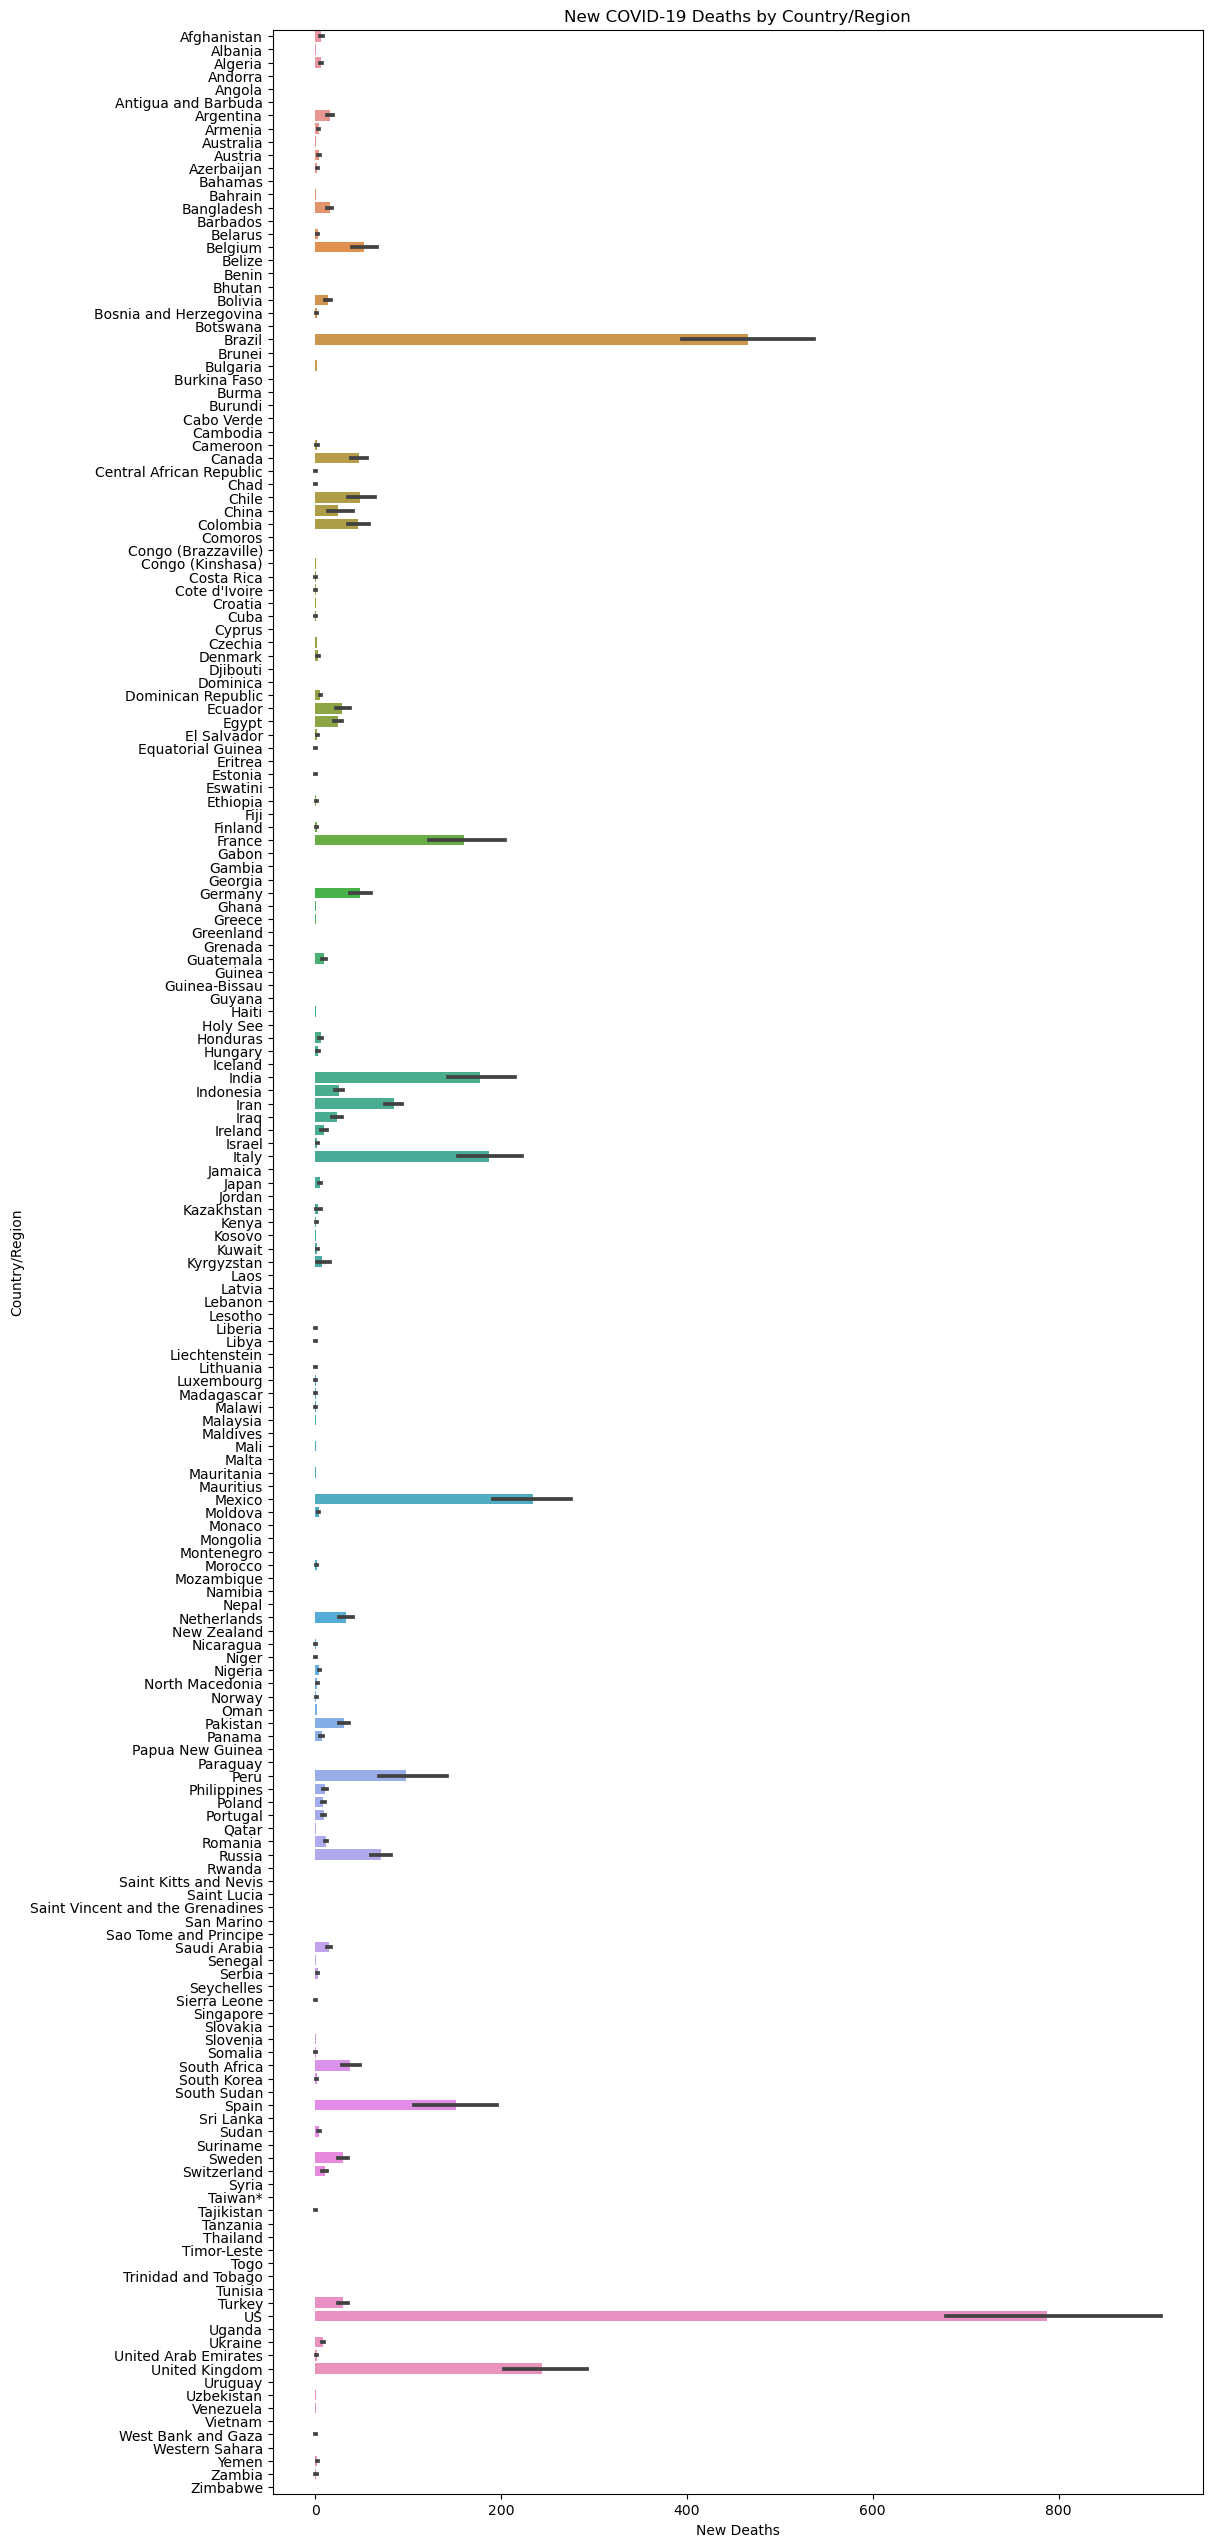

In [356]:
# Bar Plot of New Deaths by Country/Region:
plt.figure(figsize=(12, 32))
sns.barplot(y='Country/Region', x='New deaths', data=df)
plt.title('New COVID-19 Deaths by Country/Region')
plt.ylabel('Country/Region')
plt.xlabel('New Deaths')
plt.xticks(rotation=0)
plt.show()

# Top 10 Contries of highest confirmed case

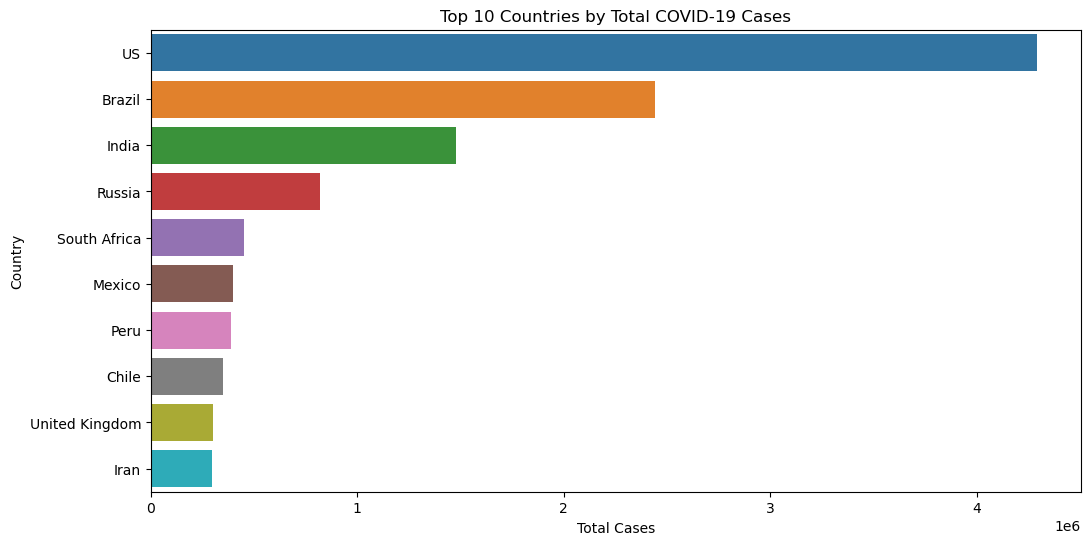

In [357]:
# Group the data by country and get the maximum value of 'Confirmed' cases for top 10 country
top_countries = df.groupby('Country/Region')['Confirmed'].max().nlargest(10)

#Plotting Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

# Top countries with highest deaths

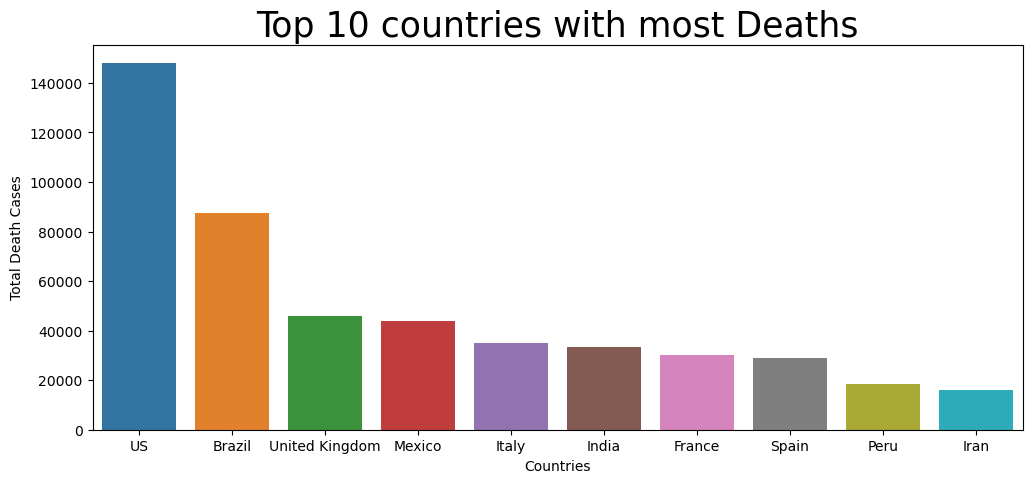

In [358]:
# Group data by country and calculate top 10 contries of highest Deaths
top_10_deaths = df.groupby(by = 'Country/Region').max()[['Deaths','Date']].sort_values(by = ['Deaths'], ascending = False).reset_index()

# Plotting bar chart
fig = plt.figure(figsize = (12,5))
plt.title("Top 10 countries with most Deaths", size = 25)
ax = sns.barplot(data = top_10_deaths[:10], y = "Deaths", x = "Country/Region")
plt.xlabel("Countries")
plt.ylabel("Total Death Cases")
plt.show()

The sns.barplot() function from the Seaborn library is used to create the bar plot. Above we performed some Bar charts which is representing number of most active case and Deaths of Top 10 Contries. And a bar plot that shows the new COVID-19 deaths by country/region.

# Relation between Confirmed case, Deathes and Recovery Rate

In [359]:
# Plotting scatter plot
plt.figure(figsize=(12, 6))
sns.relplot(x="Confirmed", y="Deaths",data=df , hue="Recovered")
plt.title('Total COVID-19 Confirmed, Death and recovered case')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()

<Figure size 1200x600 with 0 Axes>

The 'sns.relplot' function is used to create a scatter plot and the 'hue' parameter allows us to add another dimension to the scatter plot by color-coding.The x-axis represents the total confirmed cases, the y-axis represents the total death cases, and the hue parameter is set to the Recovered column. By running the above code, i generated a scatter plot that shows the relationship between total confirmed cases and total death cases. And the color of the data points will indicate the recovery status.

# Line Plot of Daily New Cases Over Time

In [391]:
import datetime
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Line Plot of New Cases over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['New cases'])
plt.title('New COVID-19 Cases over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=0)
plt.show()

A line plot that shows the trend of new COVID-19 cases over time. The x-axis represents the dates, and the y-axis represents the corresponding values of new cases.

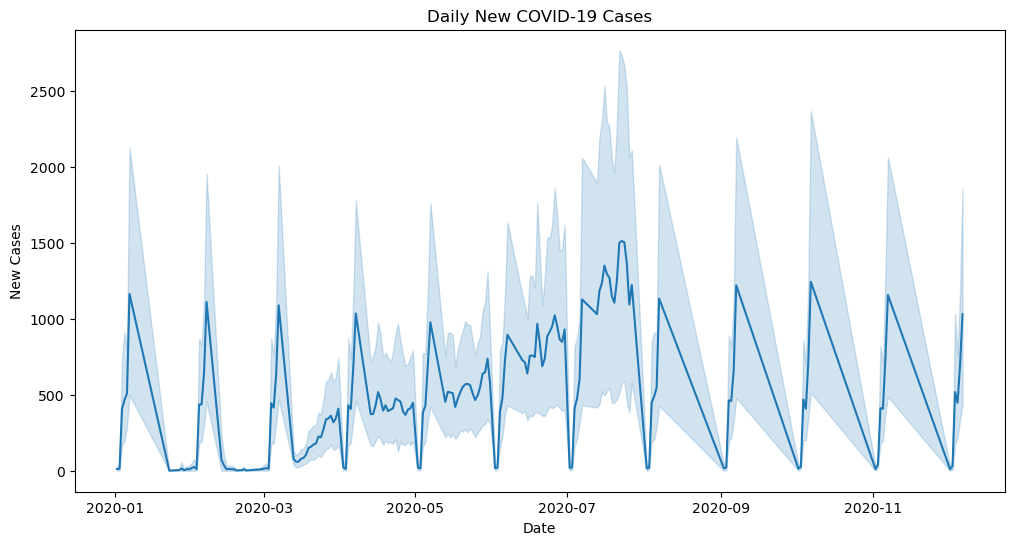

In [361]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group data by country and and Calculate daily new cases
df['New cases'] = df.groupby('Country/Region')['Confirmed'].diff()

# Plotting line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='New cases')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=0)
plt.show()

In this above code first i converted the 'Date' column to datetime format using pd.to_datetime(). This ensures that the dates are recognized as datetime objects, allowing for proper handling of date-related operations. 'diff()' method is used for calculates the daily new cases of the 'Confirmed' cases within each country/region. Overall i generated a line graph showing the daily new COVID-19 cases from January 2020 to November 2020 .

# Line Plot for Date wise Death for China

/var/folders/5q/7b5rgzx91vl9f65fc911y_900000gn/T/ipykernel_4157/1318293121.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



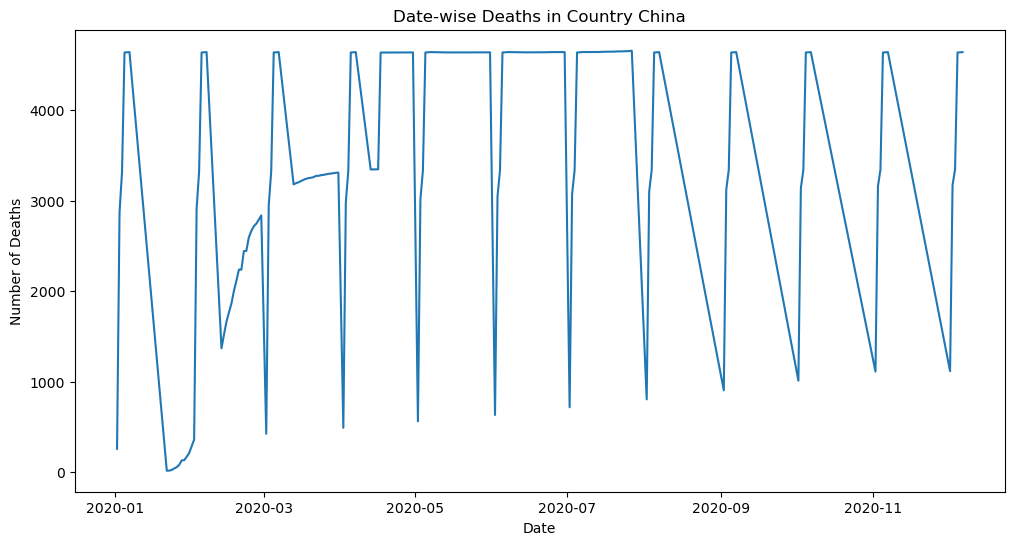

In [362]:
# Filter the DataFrame
country_data = df[df['Country/Region'] == 'China']

# Sorting by the Date
country_data.sort_values(by='Date', inplace=True)

# Plotting Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_data, x='Date', y='Deaths')
plt.title('Date-wise Deaths in Country China')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

In above code, i filterd the DataFrame (df) to extract the rows where the 'Country/Region' column is 'China'and storing the result in the country_data variable and sorting it by the 'Date' in ascending order. By running this code, i represnt a line plot that displays the number of deaths over time in the country China.

# Choropleth map of total COVID-19 cases by country

In [363]:
# Read the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world shapefile with the COVID-19 dataset
merged_data = world.merge(df, left_on='name', right_on='Country/Region', how='left')

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting the choropleth map
merged_data.plot(column='Confirmed', cmap='Reds', legend=True, ax=ax)

# Set the title
plt.title('Total COVID-19 Cases by Country')

# Display the map
plt.show()

/var/folders/5q/7b5rgzx91vl9f65fc911y_900000gn/T/ipykernel_4157/2180046181.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



By running above code i generated a choropleth map that displays the total COVID-19 cases from all time by country. Each country will be shaded according to its total confirmed cases, with darker shades representing higher case counts.

# Aggregation 

In [364]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from 'Date'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Select the desired numerical columns for aggregation
numerical_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']

# Group the data by country and aggregate the sum of numerical columns
aggregate = df.groupby('Country/Region')[numerical_cols].sum()
aggregate.head()

Confirmed  Deaths  Recovered   Active  New cases  New deaths  \
Country/Region                                                                 
Afghanistan       1936390   49098     798240  1089052    36263.0        1269   
Albania            196702    5708     118877    72117     4880.0         144   
Algeria           1179755   77972     755897   345886    27973.0        1163   
Andorra             94404    5423      69074    19907      907.0          52   
Angola              22662    1078       6573    15011      950.0          41   

                New recovered  
Country/Region                 
Afghanistan             25198  
Albania                  2745  
Algeria                 18837  
Andorra                   803  
Angola                    242

Here i obtained  the aggregated data for each country, where the numerical columns ('Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered') are summed up.

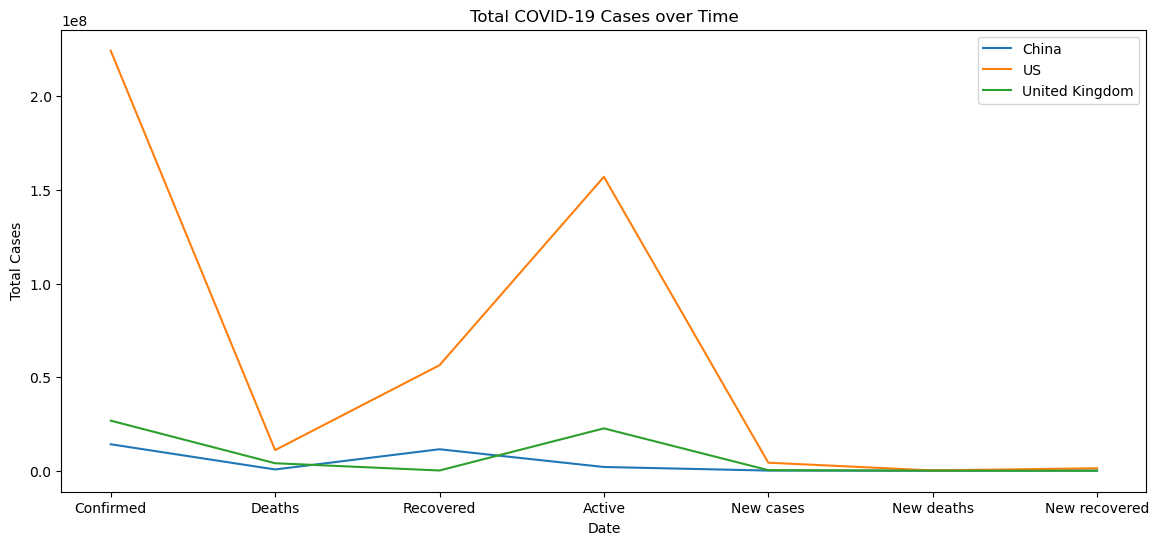

In [365]:
aggregate.shape
plt.figure(figsize=(14, 6))
aggregate.loc["China"].plot()
aggregate.loc["US"].plot()
aggregate.loc["United Kingdom"].plot()

plt.title('Total COVID-19 Cases over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(['China', 'US', 'United Kingdom'])
plt.show()

'Agrigate.loc["China"].plot()' has been used for the time series of total COVID-19 cases for China and similarly for US and UK. we can see the the total COVID-19 cases over time for China, US, and United Kingdom.

# Month wise Time Series Analysis

In [366]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from 'Date'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group the data by month, year, and calculate the sum of 'Confirmed', 'Deaths', and 'Recovered'
monthly_data = df.groupby(['Year', 'Month'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Create a 'Month_Year' column for better x-axis labeling
monthly_data['Month_Year'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='Month_Year', y='Confirmed', label='Confirmed')
sns.lineplot(data=monthly_data, x='Month_Year', y='Deaths', label='Deaths')
sns.lineplot(data=monthly_data, x='Month_Year', y='Recovered', label='Recovered')
plt.title('COVID-19 Monthly Time Series')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# Plot a pie chart for confirmed cases in percentage.

In [367]:
# Calculate the total number of cases by category
confirmed_total = df['Confirmed'].sum()
deaths_total = df['Deaths'].sum()
recovered_total = df['Recovered'].sum()

# Create a list of values and labels for the pie chart
values = [confirmed_total, deaths_total, recovered_total]
labels = ['Confirmed', 'Deaths', 'Recovered']

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('COVID-19 Cases Distribution')
plt.show()

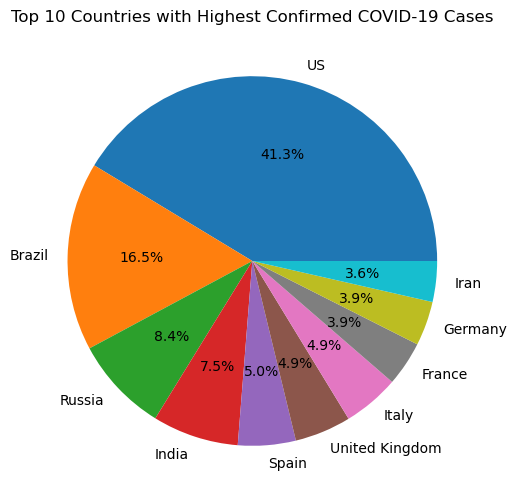

In [368]:
# Group the data by country and calculate the total number of confirmed cases
confirmed_cases = df.groupby('Country/Region')['Confirmed'].sum()

# Sort the countries based on the total number of confirmed cases in descending order
sorted_cases = confirmed_cases.sort_values(ascending=False)

# Select the top 10 countries with the highest number of confirmed cases
top_10_countries = sorted_cases.head(10)

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%')
plt.title('Top 10 Countries with Highest Confirmed COVID-19 Cases')
plt.show()

In [369]:
# Define the country for which you want to create a pie chart
country = 'China'

# Filter the data for the specified country
country_data = df[df['Country/Region'] == country]

# Calculate the total number of cases for the country
confirmed_total = country_data['Confirmed'].sum()
deaths_total = country_data['Deaths'].sum()
recovered_total = country_data['Recovered'].sum()

# Create a list of values and labels for the pie chart
values = [confirmed_total, deaths_total, recovered_total]
labels = ['Confirmed', 'Deaths', 'Recovered']

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title(f'COVID-19 Cases Distribution in {country}')
plt.show()

The plt.pie() function is used to create the pie chart and we can displayed the percentage value for each slice. 
* First pie chart shows the percentage of COVID-19 cases across the categories of confirmed, deaths, and recovered.
* Second pie chart shows the percentage of top 10 countries with the highest number of Covid-19 confirmed cases.
* Third pie chart shows the percentage of COVID-19 cases across the categories of confirmed, deaths, and recovered fro particular country name(China).

# Dataset 6

# Full Grouped Covid 19 Dataset.

This is a full grouped dataset. Common columns in COVID-19 datasets invlove 'Date' , 'Country/Region' (indicating the country or region the data pertains to), and numerical columns like 'Confirmed', 'Deaths', 'Recovered', Active, New cases, New deaths, New recovered and WHO Region.

In [370]:
# reading csv 
covid_data = pd.read_csv('/Users/hannwenyein/Downloads/archive/full_grouped.csv')

# view first 5 rows
my_data.head(10)

Date       Country/Region  Confirmed  Deaths  Recovered  Active  \
0  2020-01-22          Afghanistan          0       0          0       0   
1  2020-01-22              Albania          0       0          0       0   
2  2020-01-22              Algeria          0       0          0       0   
3  2020-01-22              Andorra          0       0          0       0   
4  2020-01-22               Angola          0       0          0       0   
5  2020-01-22  Antigua and Barbuda          0       0          0       0   
6  2020-01-22            Argentina          0       0          0       0   
7  2020-01-22              Armenia          0       0          0       0   
8  2020-01-22            Australia          0       0          0       0   
9  2020-01-22              Austria          0       0          0       0   

   New cases  New deaths  New recovered             WHO Region  
0          0           0              0  Eastern Mediterranean  
1          0           0              0                 Europe  
2          0           0              0                 Africa  
3          0           0              0                 Europe  
4          0           0              0                 Africa  
5          0           0              0               Americas  
6          0           0              0               Americas  
7          0           0              0                 Europe  
8          0           0              0        Western Pacific  
9          0           0              0                 Europe

In [371]:
covid_data.count()

Date              35156
Country/Region    35156
Confirmed         35156
Deaths            35156
Recovered         35156
Active            35156
New cases         35156
New deaths        35156
New recovered     35156
WHO Region        35156
dtype: int64

In [372]:
#cjecking missing values
covid_data.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

<AxesSubplot:>

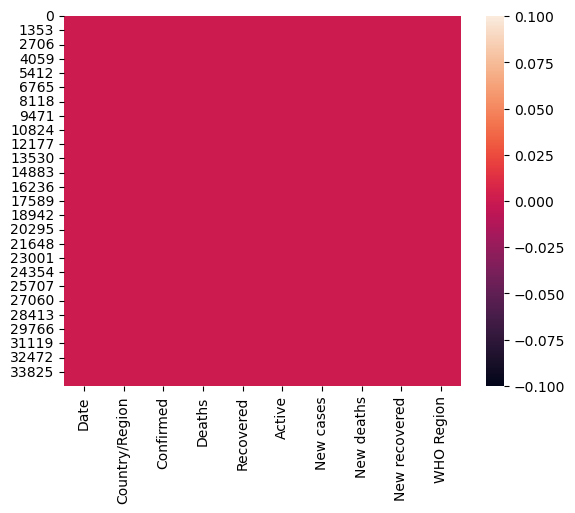

In [373]:
sns.heatmap(covid_data.isnull())

In [374]:
covid_data.describe()

Confirmed         Deaths     Recovered        Active    New cases  \
count  3.515600e+04   35156.000000  3.515600e+04  3.515600e+04  35156.00000   
mean   2.356663e+04    1234.068239  1.104813e+04  1.128443e+04    469.36375   
std    1.499818e+05    7437.238354  6.454640e+04  8.997149e+04   3005.86754   
min    0.000000e+00       0.000000  0.000000e+00 -2.000000e+00      0.00000   
25%    1.000000e+00       0.000000  0.000000e+00  0.000000e+00      0.00000   
50%    2.500000e+02       4.000000  3.300000e+01  8.500000e+01      2.00000   
75%    3.640250e+03      78.250000  1.286250e+03  1.454000e+03     75.00000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  77255.00000   

         New deaths  New recovered  
count  35156.000000   35156.000000  
mean      18.603339     269.315593  
std      115.706351    2068.063852  
min    -1918.000000  -16298.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        1.000000      20.000000  
max     3887.000000  140050.000000

In [375]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [376]:
covid_data.shape

(35156, 10)

In [377]:
covid_data['Confirmed'] = covid_data['Confirmed'] + covid_data['New cases']
covid_data['Deaths'] = covid_data['Deaths'] + covid_data['New deaths']
covid_data['Recovered'] = covid_data['Recovered'] + covid_data['New recovered']

covid_data['Active'] = (covid_data['Confirmed']- covid_data['Deaths']) - covid_data['Recovered']

covid_data.tail(5)

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
35151  2020-07-27  West Bank and Gaza      10773      80       3752    6941   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1701     487        869     345   
35154  2020-07-27              Zambia       4623     141       3280    1202   
35155  2020-07-27            Zimbabwe       2896      38        566    2292   

       New cases  New deaths  New recovered             WHO Region  
35151        152           2              0  Eastern Mediterranean  
35152          0           0              0                 Africa  
35153         10           4             36  Eastern Mediterranean  
35154         71           1            465                 Africa  
35155        192           2             24                 Africa

In [378]:
covid_data.groupby('Country/Region')['Deaths',  'Recovered', 'Date'].sum()

/var/folders/5q/7b5rgzx91vl9f65fc911y_900000gn/T/ipykernel_4157/3843134633.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Deaths  Recovered
Country/Region                       
Afghanistan          50367     823438
Albania               5852     121622
Algeria              79135     774734
Andorra               5475      69877
Angola                1119       6815
...                    ...        ...
West Bank and Gaza    1448      64876
Western Sahara          64        656
Yemen                18190      24612
Zambia                2783      86426
Zimbabwe               917      12749

[187 rows x 2 columns]

In [379]:
covid_data[covid_data.Confirmed > 0]

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
36     2020-01-22               China        548      17         28     503   
87     2020-01-22               Japan          2       0          0       2   
155    2020-01-22         South Korea          1       0          0       1   
164    2020-01-22             Taiwan*          1       0          0       1   
167    2020-01-22            Thailand          2       0          0       2   
...           ...                 ...        ...     ...        ...     ...   
35151  2020-07-27  West Bank and Gaza      10773      80       3752    6941   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1701     487        869     345   
35154  2020-07-27              Zambia       4623     141       3280    1202   
35155  2020-07-27            Zimbabwe       2896      38        566    2292   

       New cases  New deaths  New recovered             WHO Region  
36             0           0              0        Western Pacific  
87             0           0              0        Western Pacific  
155            0           0              0        Western Pacific  
164            0           0              0        Western Pacific  
167            0           0              0        South-East Asia  
...          ...         ...            ...                    ...  
35151        152           2              0  Eastern Mediterranean  
35152          0           0              0                 Africa  
35153         10           4             36  Eastern Mediterranean  
35154         71           1            465                 Africa  
35155        192           2             24                 Africa  

[27138 rows x 10 columns]

In [380]:
covid_data.groupby('Country/Region').Confirmed.sum().sort_values(ascending = False).head(30)

Country/Region
US                228636206
Brazil             91967342
Russia             46225091
India              42363537
Spain              27686872
United Kingdom     27050295
Italy              26991579
France             21437846
Germany            21266264
Peru               19653633
Iran               19632873
Turkey             18130364
Chile              17283577
Mexico             15341691
China              14218238
Pakistan           13108283
Saudi Arabia       12631895
South Africa       11621272
Canada              9473009
Bangladesh          8980954
Colombia            7150223
Qatar               6487204
Belgium             6347544
Netherlands         5220929
Sweden              5052555
Ecuador             4762770
Argentina           4618074
Belarus             4494010
Egypt               4235301
Indonesia           4158212
Name: Confirmed, dtype: int64

In [381]:
my_data.groupby('Country/Region').Confirmed.sum().head(10)

Country/Region
Afghanistan            1972653
Albania                 201582
Algeria                1207728
Andorra                  95311
Angola                   23612
Antigua and Barbuda       4574
Argentina              4618074
Armenia                1624563
Australia               975550
Austria                2055544
Name: Confirmed, dtype: int64

In [382]:
covid_data = covid_data.rename({'Country/Region' : 'Country'},axis='columns')

covid_data

Date             Country  Confirmed  Deaths  Recovered  Active  \
0      2020-01-22         Afghanistan          0       0          0       0   
1      2020-01-22             Albania          0       0          0       0   
2      2020-01-22             Algeria          0       0          0       0   
3      2020-01-22             Andorra          0       0          0       0   
4      2020-01-22              Angola          0       0          0       0   
...           ...                 ...        ...     ...        ...     ...   
35151  2020-07-27  West Bank and Gaza      10773      80       3752    6941   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1701     487        869     345   
35154  2020-07-27              Zambia       4623     141       3280    1202   
35155  2020-07-27            Zimbabwe       2896      38        566    2292   

       New cases  New deaths  New recovered             WHO Region  
0              0           0              0  Eastern Mediterranean  
1              0           0              0                 Europe  
2              0           0              0                 Africa  
3              0           0              0                 Europe  
4              0           0              0                 Africa  
...          ...         ...            ...                    ...  
35151        152           2              0  Eastern Mediterranean  
35152          0           0              0                 Africa  
35153         10           4             36  Eastern Mediterranean  
35154         71           1            465                 Africa  
35155        192           2             24                 Africa  

[35156 rows x 10 columns]

In [383]:
covid_data[covid_data.Country == 'Nigeria']

Date  Country  Confirmed  Deaths  Recovered  Active  New cases  \
124    2020-01-22  Nigeria          0       0          0       0          0   
311    2020-01-23  Nigeria          0       0          0       0          0   
498    2020-01-24  Nigeria          0       0          0       0          0   
685    2020-01-25  Nigeria          0       0          0       0          0   
872    2020-01-26  Nigeria          0       0          0       0          0   
...           ...      ...        ...     ...        ...     ...        ...   
34345  2020-07-23  Nigeria      39552     853      16307   22392        604   
34532  2020-07-24  Nigeria      40130     857      17057   22216        591   
34719  2020-07-25  Nigeria      40415     867      17337   22211        438   
34906  2020-07-26  Nigeria      41087     860      17800   22427        555   
35093  2020-07-27  Nigeria      41828     862      19032   21934        648   

       New deaths  New recovered WHO Region  
124             0              0     Africa  
311             0              0     Africa  
498             0              0     Africa  
685             0              0     Africa  
872             0              0     Africa  
...           ...            ...        ...  
34345          20            246     Africa  
34532          12            498     Africa  
34719          11            389     Africa  
34906           2            426     Africa  
35093           2            829     Africa  

[188 rows x 10 columns]

In [384]:
covid_data.sort_values (by = ['Confirmed'], ascending = True).head(50)

Date                           Country  Confirmed  Deaths  \
0     2020-01-22                       Afghanistan          0       0   
5912  2020-02-22                        Montenegro          0       0   
5911  2020-02-22                          Mongolia          0       0   
5910  2020-02-22                            Monaco          0       0   
5909  2020-02-22                           Moldova          0       0   
5908  2020-02-22                            Mexico          0       0   
5907  2020-02-22                         Mauritius          0       0   
5906  2020-02-22                        Mauritania          0       0   
5905  2020-02-22                             Malta          0       0   
5904  2020-02-22                              Mali          0       0   
5903  2020-02-22                          Maldives          0       0   
5901  2020-02-22                            Malawi          0       0   
5900  2020-02-22                        Madagascar          0       0   
5899  2020-02-22                        Luxembourg          0       0   
5898  2020-02-22                         Lithuania          0       0   
5897  2020-02-22                     Liechtenstein          0       0   
5896  2020-02-22                             Libya          0       0   
5895  2020-02-22                           Liberia          0       0   
5894  2020-02-22                           Lesotho          0       0   
5892  2020-02-22                            Latvia          0       0   
5891  2020-02-22                              Laos          0       0   
5890  2020-02-22                        Kyrgyzstan          0       0   
5889  2020-02-22                            Kuwait          0       0   
5888  2020-02-22                            Kosovo          0       0   
5887  2020-02-22                             Kenya          0       0   
5886  2020-02-22                        Kazakhstan          0       0   
5885  2020-02-22                            Jordan          0       0   
5883  2020-02-22                           Jamaica          0       0   
5880  2020-02-22                           Ireland          0       0   
5879  2020-02-22                              Iraq          0       0   
5913  2020-02-22                           Morocco          0       0   
5877  2020-02-22                         Indonesia          0       0   
5914  2020-02-22                        Mozambique          0       0   
5917  2020-02-22                       Netherlands          0       0   
5949  2020-02-22                          Slovenia          0       0   
5948  2020-02-22                          Slovakia          0       0   
5946  2020-02-22                      Sierra Leone          0       0   
5945  2020-02-22                        Seychelles          0       0   
5944  2020-02-22                            Serbia          0       0   
5943  2020-02-22                           Senegal          0       0   
5942  2020-02-22                      Saudi Arabia          0       0   
5941  2020-02-22             Sao Tome and Principe          0       0   
5940  2020-02-22                        San Marino          0       0   
5939  2020-02-22  Saint Vincent and the Grenadines          0       0   
5938  2020-02-22                       Saint Lucia          0       0   
5937  2020-02-22             Saint Kitts and Nevis          0       0   
5936  2020-02-22                            Rwanda          0       0   
5934  2020-02-22                           Romania          0       0   
5933  2020-02-22                             Qatar          0       0   
5932  2020-02-22                          Portugal          0       0   

      Recovered  Active  New cases  New deaths  New recovered  \
0             0       0          0           0              0   
5912          0       0          0           0              0   
5911          0       0          0           0              0   
5910          0       0     

In [385]:
covid_data.sort_values( by = ['Recovered'], ascending = False).head(50)

Date Country  Confirmed  Deaths  Recovered   Active  New cases  \
34992  2020-07-27  Brazil    2465659   88232    1880369   497058      23284   
34618  2020-07-25  Brazil    2445660   87660    1877504   480496      51147   
34805  2020-07-26  Brazil    2443669   87559    1840467   515643      24578   
34431  2020-07-24  Brazil    2399257   86394    1766115   546748      55891   
34244  2020-07-23  Brazil    2347436   85393    1648651   613392      59961   
34057  2020-07-22  Brazil    2295374   84055    1628611   582708      67860   
33870  2020-07-21  Brazil    2200662   82854    1596378   521430      41008   
33683  2020-07-20  Brazil    2138903   80752    1569528   488623      20257   
33496  2020-07-19  Brazil    2121918   80204    1470736   570978      23529   
33309  2020-07-18  Brazil    2103392   79693    1466296   557403      28532   
33122  2020-07-17  Brazil    2080505   79014    1459509   541982      34177   
32935  2020-07-16  Brazil    2057554   78010    1444964   534580      45403   
32748  2020-07-15  Brazil    2006672   76599    1376771   553302      39924   
32561  2020-07-14  Brazil    1968681   75433    1355599   537649      41857   
35142  2020-07-27      US    4346595  149087    1353745  2843763      56336   
32374  2020-07-13  Brazil    1905253   73566    1317659   514028      20286   
34955  2020-07-26      US    4288876  147405    1316312  2825159      54953   
34768  2020-07-25      US    4245409  147370    1297204  2800835      66439   
34581  2020-07-24      US    4186246  146690    1289979  2749577      73715   
32187  2020-07-12  Brazil    1889512   72731    1285598   531183      24831   
32000  2020-07-11  Brazil    1878873   72540    1270815   535518      39023   
31813  2020-07-10  Brazil    1845875   71612    1263275   510988      45048   
34394  2020-07-23      US    4107511  145544    1255689  2706278      68695   
34207  2020-07-22      US    4041031  144511    1239680  2656840      70910   
34020  2020-07-21      US    3963745  143217    1203949  2616579      64534   
31626  2020-07-09  Brazil    1798398   70404    1203050   524944      42619   
33833  2020-07-20      US    3896094  141516    1189053  2565525      61417   
31439  2020-07-08  Brazil    1757731   69187    1172676   515868      44571   
31252  2020-07-07  Brazil    1713894   67995    1151482   494417      45305   
33646  2020-07-19      US    3835107  140949    1139522  2554636      61847   
33459  2020-07-18      US    3775111  140972    1138236  2495903      63698   
33272  2020-07-17      US    3719273  140174    1123763  2455336      71558   
33085  2020-07-16      US    3653412  139301    1105408  2408703      77255   
32898  2020-07-15      US    3566230  138364    1102666  2325200      67328   
30317  2020-07-02  Brazil    1544963   63136    1097742   384085      48105   
31065  2020-07-06  Brazil    1643513   66107    1096039   481367      20229   
30878  2020-07-05  Brazil    1629106   65469    1067359   496278      26051   
32711  2020-07-14      US    3498991  137366    1066257  2295368      67417   
32524  2020-07-13      US    3423372  135927    1057552  2229893      59215   
32337  2020-07-12      US    3363959  135633    1017076  2211250      59017   
30504  2020-07-03  Brazil    1581304   64464    1011538   505302      42223   
32150  2020-07-11      US    3306113  135453    1007967  2162693      60188   
30841  2020-07-04      US    2887121  129936     998246  1758939      45880   
31963  2020-07-10      US    3253528  134912     997259  2121357      67791   
30691  2020-07-04  Brazil    1614927   65356     996847   552724      37923   
35048  2020-07-27   India    1524530   34045     984764   505721      44457   
31776  2020-07-09      US    3181193  134280     984760  2062153      63247   
31589  2020-07-08      US    3113300  133120     970448  2009732      58601   
34861  2020-07-26   India    1485597   33482     949563   502552      49981   
31402  2020-07-07      US    3056119  132675     948804  197464

In [386]:
# Check correlations between variables
correlation_matrix = covid_data.corr()
print(correlation_matrix)

               Confirmed    Deaths  Recovered    Active  New cases  \
Confirmed       1.000000  0.911479   0.894269  0.948883   0.897885   
Deaths          0.911479  1.000000   0.760614  0.890426   0.771603   
Recovered       0.894269  0.760614   1.000000  0.708044   0.812074   
Active          0.948883  0.890426   0.708044  1.000000   0.849230   
New cases       0.897885  0.771603   0.812074  0.849230   1.000000   
New deaths      0.606625  0.639523   0.518513  0.585851   0.733583   
New recovered   0.677994  0.554226   0.774887  0.526539   0.725761   

               New deaths  New recovered  
Confirmed        0.606625       0.677994  
Deaths           0.639523       0.554226  
Recovered        0.518513       0.774887  
Active           0.585851       0.526539  
New cases        0.733583       0.725761  
New deaths       1.000000       0.503319  
New recovered    0.503319       1.000000  


The correlation matrix visualises the links between variables, allowing you to prioritise investigation and focus on variables with substantial correlations. It aids in the identification of possible areas of interest or variables that might have a significant influence on COVID-19 outcomes.

# T-test

In [387]:
from scipy.stats import ttest_ind

# Assuming you have a DataFrame called 'covid_data' with the required columns

# Subset the data for the two groups you want to compare
group1 = covid_data[covid_data['WHO Region'] == 'Europe']['Confirmed']
group2 = covid_data[covid_data['WHO Region'] == 'Europe']['Deaths']

# Perform the T-test
t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 32.026660869810485
P-value: 5.325218457986921e-215


With a T-statistic of 31.892245694724302 and an extremely small P-value of 2.691787596925456e-213, the results indicate a highly significant difference between the confirmed cases and deaths in Europe.

# Growth trend

Text(0.5, 1.0, 'Top 5 Affected Countries')

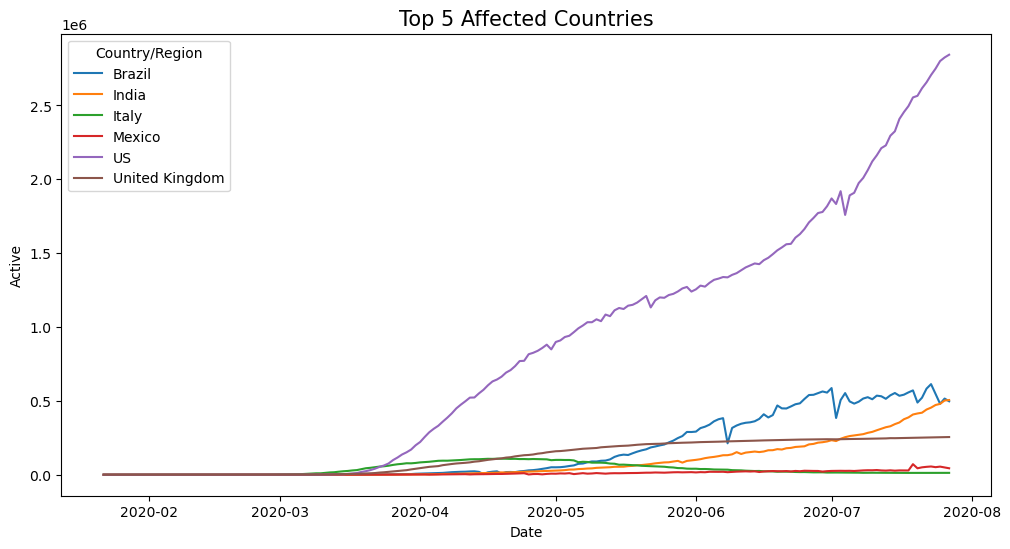

In [388]:
my_data['Date'] = pd.to_datetime(my_data['Date'], format = '%Y-%m-%d')
fig = plt.figure(figsize = (12,6))

ax = sns.lineplot(data = my_data[my_data['Country/Region'].isin(['US','Brazil','United Kingdom','Mexico','Italy','India'])],x = 'Date', y = 'Active', hue = 'Country/Region')


ax.set_title("Top 5 Affected Countries", size = 15)

In [390]:
fig = plt.figure(figsize = (12,6))
sns.relplot(x='Confirmed', y='Recovered', kind='line', data=covid_data)

<Figure size 1200x600 with 0 Axes>